In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent.parent); os.chdir(set_path)

In [2]:
from TargetDistributions.DoubleWell import ManyWellEnergy
import torch
from FittedModels.utils.plotting_utils import plot_sampling_info, plot_divergences
torch.manual_seed(5)
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from FittedModels.train import LearntDistributionManager
from Utils.numerical_utils import quadratic_function as expectation_function
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.utils.plotting_utils import plot_history
import matplotlib.pyplot as plt
from FittedModels.utils.plotting_utils import plot_samples_vs_contours_many_well
torch.set_default_dtype(torch.float64)

In [3]:
def plotter(*args, **kwargs):
    # wrap plotting function like this so it displays during training
    plot_samples_vs_contours_many_well(*args, **kwargs)
    plt.show()

In [4]:
target = ManyWellEnergy(dim=8, a=-0.5, b=-6)

# alpha=2 divergence

In [28]:
torch.manual_seed(1)
# ******************* Parameters *******************
dim = 8
epochs = int(1e4)
n_samples_estimation = int(1e5)
batch_size = int(1e3)
lr = 1e-5
train_prior = False
weight_decay = 1e-6
clip_grad_norm = False
optimizer = "Adam"
flow_type = "RealNVP"
loss_type = "DReG"
initial_flow_scaling = 1.5
n_flow_steps = 64
annealing = True
n_plots = 5
flow_kwargs = {"use_exp": False}

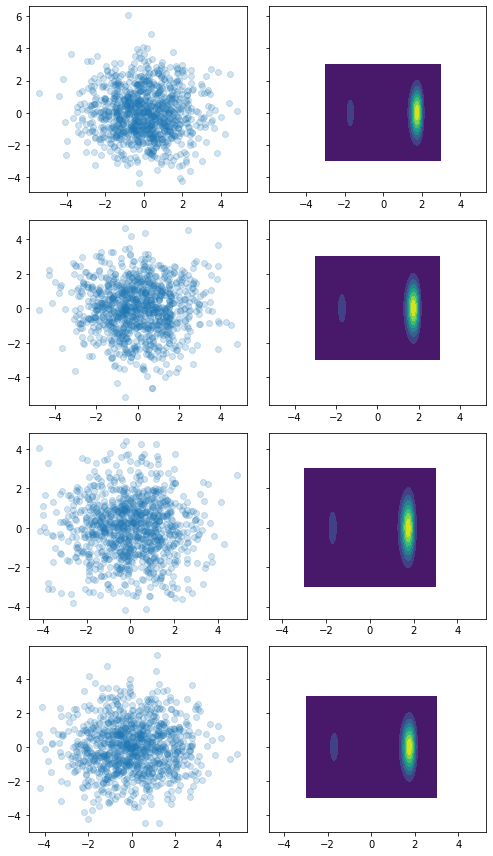

effective sample size before is 0.0005755491523216356



In [29]:
torch.manual_seed(0)  # 0
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=n_flow_steps,
                           scaling_factor=initial_flow_scaling, flow_type=flow_type, **flow_kwargs)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type=loss_type,
                                   lr=lr, optimizer=optimizer, annealing=annealing, weight_decay=weight_decay)

plotter(tester)
plt.show()
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(f"effective sample size before is {info_before['effective_sample_size'] / n_samples_estimation}\n")


# Train

loss: -4.147655990219397, mean log p_x -10.217441481463435:   0%|          | 0/10000 [00:00<?, ?it/s]

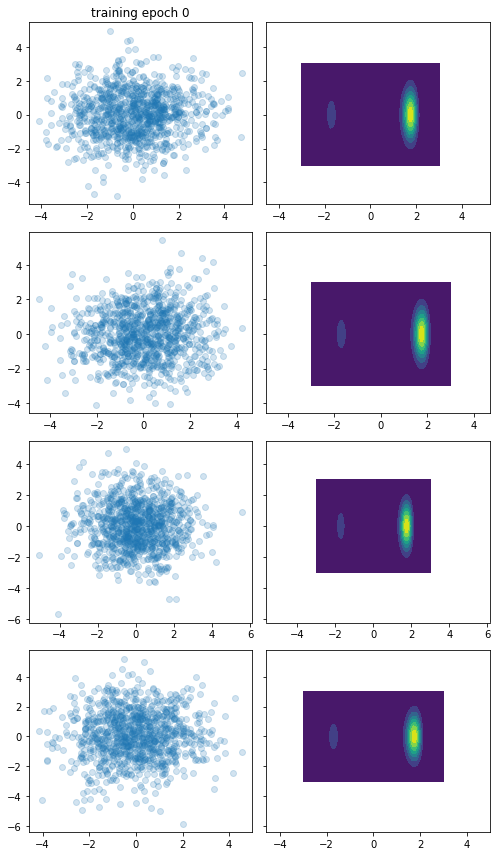

loss: 39.98498055277495, mean log p_x -71.54758277467994:  18%|█▊        | 1788/10000 [06:15<24:36,  5.56it/s]     

Nan/Inf loss encountered


loss: 39.98498055277495, mean log p_x -71.54758277467994:  18%|█▊        | 1792/10000 [06:16<23:46,  5.75it/s]

Nan/Inf loss encountered


loss: -6.339512394150992, mean log p_x -102.06975892563743:  18%|█▊        | 1808/10000 [06:19<24:03,  5.68it/s]

Nan/Inf loss encountered


loss: -6.339512394150992, mean log p_x -102.06975892563743:  18%|█▊        | 1812/10000 [06:19<23:07,  5.90it/s]

Nan/Inf loss encountered


loss: -6.339512394150992, mean log p_x -102.06975892563743:  18%|█▊        | 1821/10000 [06:21<23:27,  5.81it/s]

Nan/Inf loss encountered


loss: -6.339512394150992, mean log p_x -102.06975892563743:  18%|█▊        | 1838/10000 [06:24<21:34,  6.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: -6.339512394150992, mean log p_x -102.06975892563743:  19%|█▊        | 1852/10000 [06:27<24:00,  5.66it/s]

Nan/Inf loss encountered


loss: -6.339512394150992, mean log p_x -102.06975892563743:  19%|█▊        | 1874/10000 [06:32<24:23,  5.55it/s]

Nan/Inf loss encountered


loss: -6.339512394150992, mean log p_x -102.06975892563743:  19%|█▉        | 1876/10000 [06:32<22:32,  6.01it/s]

Nan/Inf loss encountered


loss: -6.339512394150992, mean log p_x -102.06975892563743:  19%|█▉        | 1879/10000 [06:32<22:10,  6.10it/s]

Nan/Inf loss encountered


loss: -6.339512394150992, mean log p_x -102.06975892563743:  19%|█▉        | 1881/10000 [06:33<21:30,  6.29it/s]

Nan/Inf loss encountered


loss: -6.339512394150992, mean log p_x -102.06975892563743:  19%|█▉        | 1884/10000 [06:33<19:38,  6.89it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: -6.339512394150992, mean log p_x -102.06975892563743:  19%|█▉        | 1894/10000 [06:35<21:42,  6.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  19%|█▉        | 1911/10000 [06:39<22:01,  6.12it/s]  

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  19%|█▉        | 1914/10000 [06:39<22:18,  6.04it/s]

Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  19%|█▉        | 1920/10000 [06:40<21:37,  6.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  19%|█▉        | 1923/10000 [06:41<24:36,  5.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  19%|█▉        | 1927/10000 [06:41<22:06,  6.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  19%|█▉        | 1929/10000 [06:42<19:03,  7.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  19%|█▉        | 1930/10000 [06:42<18:08,  7.42it/s]

Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  19%|█▉        | 1933/10000 [06:42<18:22,  7.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  19%|█▉        | 1935/10000 [06:43<19:30,  6.89it/s]

Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  19%|█▉        | 1938/10000 [06:43<18:29,  7.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  19%|█▉        | 1939/10000 [06:43<17:36,  7.63it/s]

Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  19%|█▉        | 1943/10000 [06:44<21:14,  6.32it/s]

Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  19%|█▉        | 1946/10000 [06:44<19:15,  6.97it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  19%|█▉        | 1947/10000 [06:44<18:16,  7.34it/s]

Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  19%|█▉        | 1949/10000 [06:45<19:11,  6.99it/s]

Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  20%|█▉        | 1951/10000 [06:45<19:44,  6.80it/s]

Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  20%|█▉        | 1954/10000 [06:46<21:09,  6.34it/s]

Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  20%|█▉        | 1958/10000 [06:46<19:57,  6.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  20%|█▉        | 1959/10000 [06:46<18:46,  7.14it/s]

Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  20%|█▉        | 1961/10000 [06:47<19:28,  6.88it/s]

Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  20%|█▉        | 1965/10000 [06:47<21:25,  6.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  20%|█▉        | 1966/10000 [06:47<19:55,  6.72it/s]

Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  20%|█▉        | 1968/10000 [06:48<20:20,  6.58it/s]

Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  20%|█▉        | 1971/10000 [06:48<19:14,  6.96it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  20%|█▉        | 1973/10000 [06:48<17:43,  7.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  20%|█▉        | 1974/10000 [06:49<17:21,  7.71it/s]

Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  20%|█▉        | 1978/10000 [06:49<21:33,  6.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  20%|█▉        | 1979/10000 [06:49<19:52,  6.73it/s]

Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  20%|█▉        | 1984/10000 [06:50<21:56,  6.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  20%|█▉        | 1988/10000 [06:51<20:12,  6.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  20%|█▉        | 1991/10000 [06:52<21:30,  6.20it/s]

Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  20%|█▉        | 1993/10000 [06:52<21:01,  6.35it/s]

Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  20%|█▉        | 1996/10000 [06:52<19:15,  6.93it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 26.91711779310485, mean log p_x -277444674.3100703:  20%|█▉        | 1998/10000 [06:53<17:20,  7.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2000/10000 [06:53<21:59,  6.07it/s] 

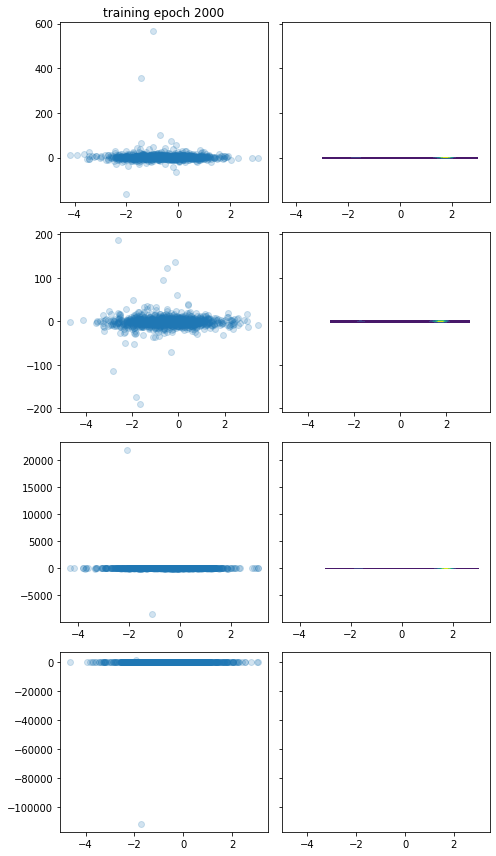

loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2004/10000 [06:55<33:21,  3.99it/s]  

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2006/10000 [06:55<24:45,  5.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2007/10000 [06:55<22:07,  6.02it/s]

Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2009/10000 [06:55<22:04,  6.03it/s]

Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2012/10000 [06:56<20:03,  6.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2013/10000 [06:56<18:52,  7.05it/s]

Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2016/10000 [06:56<18:20,  7.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2020/10000 [06:57<20:04,  6.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2022/10000 [06:57<20:23,  6.52it/s]

Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2026/10000 [06:58<21:32,  6.17it/s]

Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2030/10000 [06:59<19:35,  6.78it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2031/10000 [06:59<18:18,  7.25it/s]

Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2034/10000 [06:59<17:47,  7.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2037/10000 [07:00<17:46,  7.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2039/10000 [07:00<16:37,  7.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2041/10000 [07:00<15:59,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2042/10000 [07:00<15:47,  8.40it/s]

Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2045/10000 [07:01<19:19,  6.86it/s]

Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2047/10000 [07:01<19:27,  6.81it/s]

Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  20%|██        | 2050/10000 [07:01<18:21,  7.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2052/10000 [07:02<17:33,  7.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2056/10000 [07:02<18:54,  7.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2058/10000 [07:03<17:28,  7.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2059/10000 [07:03<16:57,  7.81it/s]

Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2064/10000 [07:04<20:38,  6.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2065/10000 [07:04<21:00,  6.29it/s]

Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2068/10000 [07:04<19:33,  6.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2070/10000 [07:04<17:44,  7.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2071/10000 [07:04<17:15,  7.65it/s]

Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2075/10000 [07:05<20:24,  6.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2077/10000 [07:05<18:04,  7.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2079/10000 [07:06<16:54,  7.81it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2080/10000 [07:06<17:13,  7.67it/s]

Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2082/10000 [07:06<21:14,  6.21it/s]

Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2085/10000 [07:07<19:53,  6.63it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2087/10000 [07:07<19:50,  6.65it/s]

Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2090/10000 [07:07<18:20,  7.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2091/10000 [07:08<17:22,  7.59it/s]

Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2094/10000 [07:08<17:35,  7.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2097/10000 [07:08<18:02,  7.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: 39.66214106679401, mean log p_x -333.501337010334:  21%|██        | 2099/10000 [07:09<16:47,  7.84it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██        | 2101/10000 [07:09<24:06,  5.46it/s]                            

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██        | 2103/10000 [07:09<19:52,  6.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██        | 2106/10000 [07:10<21:28,  6.13it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██        | 2109/10000 [07:10<20:39,  6.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██        | 2111/10000 [07:11<20:28,  6.42it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██        | 2113/10000 [07:11<20:41,  6.35it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██        | 2116/10000 [07:11<19:04,  6.89it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██        | 2118/10000 [07:12<19:53,  6.60it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██        | 2122/10000 [07:12<19:36,  6.70it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██        | 2124/10000 [07:13<17:41,  7.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██▏       | 2126/10000 [07:13<16:37,  7.90it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██▏       | 2128/10000 [07:13<16:05,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██▏       | 2130/10000 [07:13<15:51,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██▏       | 2132/10000 [07:14<15:41,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██▏       | 2134/10000 [07:14<16:01,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██▏       | 2136/10000 [07:14<16:05,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██▏       | 2139/10000 [07:15<17:33,  7.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██▏       | 2140/10000 [07:15<16:57,  7.73it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██▏       | 2143/10000 [07:15<17:50,  7.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██▏       | 2145/10000 [07:15<16:42,  7.83it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██▏       | 2146/10000 [07:16<16:40,  7.85it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██▏       | 2149/10000 [07:16<18:01,  7.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2151/10000 [07:16<16:47,  7.79it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2153/10000 [07:16<16:17,  8.03it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2154/10000 [07:17<16:13,  8.06it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2157/10000 [07:17<18:28,  7.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2158/10000 [07:17<17:35,  7.43it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2161/10000 [07:18<18:08,  7.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2163/10000 [07:18<18:08,  7.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2165/10000 [07:18<16:49,  7.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2166/10000 [07:18<16:29,  7.92it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2169/10000 [07:19<17:43,  7.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2171/10000 [07:19<16:48,  7.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2173/10000 [07:19<16:15,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2175/10000 [07:19<15:57,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2177/10000 [07:20<15:44,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2179/10000 [07:20<15:55,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2181/10000 [07:20<15:47,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2183/10000 [07:20<15:49,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2185/10000 [07:21<15:47,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2187/10000 [07:21<16:56,  7.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2188/10000 [07:21<18:02,  7.21it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2193/10000 [07:22<19:39,  6.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2196/10000 [07:22<18:29,  7.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2198/10000 [07:23<16:51,  7.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2200/10000 [07:23<18:24,  7.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2203/10000 [07:23<19:03,  6.82it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2205/10000 [07:24<17:08,  7.58it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2207/10000 [07:24<16:15,  7.99it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2209/10000 [07:24<15:55,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2212/10000 [07:25<17:16,  7.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2214/10000 [07:25<16:45,  7.75it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2216/10000 [07:25<16:04,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2218/10000 [07:25<15:24,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2220/10000 [07:26<17:16,  7.51it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2222/10000 [07:26<18:17,  7.09it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2225/10000 [07:26<17:41,  7.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2227/10000 [07:27<16:17,  7.95it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2229/10000 [07:27<15:31,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2231/10000 [07:27<15:18,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2233/10000 [07:27<15:05,  8.58it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2235/10000 [07:28<14:54,  8.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2237/10000 [07:28<14:46,  8.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2239/10000 [07:28<14:45,  8.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2241/10000 [07:28<14:42,  8.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2244/10000 [07:29<16:18,  7.93it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2246/10000 [07:29<15:35,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  22%|██▏       | 2248/10000 [07:29<15:11,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2251/10000 [07:30<16:36,  7.77it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2253/10000 [07:30<15:36,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2255/10000 [07:30<15:37,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2257/10000 [07:30<15:31,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2259/10000 [07:31<15:24,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2260/10000 [07:31<15:28,  8.34it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2263/10000 [07:31<16:58,  7.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2265/10000 [07:31<16:12,  7.96it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2268/10000 [07:32<17:12,  7.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2270/10000 [07:32<16:43,  7.70it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2272/10000 [07:32<16:20,  7.88it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2273/10000 [07:32<16:07,  7.98it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2276/10000 [07:33<17:10,  7.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2278/10000 [07:33<16:09,  7.97it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2280/10000 [07:33<15:45,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2282/10000 [07:34<15:29,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2286/10000 [07:34<17:56,  7.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2289/10000 [07:35<17:57,  7.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2291/10000 [07:35<16:35,  7.74it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2293/10000 [07:35<15:40,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2295/10000 [07:35<15:23,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  23%|██▎       | 2299/10000 [07:36<17:43,  7.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2300/10000 [07:36<16:45,  7.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2303/10000 [07:37<20:03,  6.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2306/10000 [07:37<18:41,  6.86it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2308/10000 [07:37<17:07,  7.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2311/10000 [07:38<18:38,  6.88it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2313/10000 [07:38<17:29,  7.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2315/10000 [07:38<16:23,  7.81it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2317/10000 [07:39<15:53,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2319/10000 [07:39<16:25,  7.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2321/10000 [07:39<15:43,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2323/10000 [07:39<15:09,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2325/10000 [07:40<14:58,  8.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2327/10000 [07:40<14:44,  8.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2329/10000 [07:40<14:41,  8.70it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2331/10000 [07:40<14:49,  8.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2334/10000 [07:41<16:23,  7.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2336/10000 [07:41<15:22,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2338/10000 [07:41<15:12,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2340/10000 [07:41<15:11,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2342/10000 [07:42<15:08,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2344/10000 [07:42<15:03,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2347/10000 [07:42<16:24,  7.77it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  23%|██▎       | 2349/10000 [07:42<16:03,  7.94it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▎       | 2351/10000 [07:43<15:58,  7.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▎       | 2354/10000 [07:43<17:05,  7.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▎       | 2356/10000 [07:43<16:08,  7.89it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▎       | 2357/10000 [07:44<17:16,  7.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▎       | 2359/10000 [07:44<18:48,  6.77it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▎       | 2362/10000 [07:44<17:03,  7.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▎       | 2364/10000 [07:45<16:16,  7.82it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▎       | 2366/10000 [07:45<15:41,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▎       | 2368/10000 [07:45<15:33,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▎       | 2370/10000 [07:45<19:35,  6.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▎       | 2372/10000 [07:46<20:02,  6.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▎       | 2374/10000 [07:46<20:03,  6.34it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▍       | 2378/10000 [07:47<20:35,  6.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▍       | 2380/10000 [07:47<19:31,  6.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▍       | 2382/10000 [07:47<17:31,  7.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▍       | 2384/10000 [07:48<16:34,  7.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▍       | 2386/10000 [07:48<16:20,  7.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▍       | 2387/10000 [07:48<17:37,  7.20it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▍       | 2391/10000 [07:49<19:32,  6.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▍       | 2393/10000 [07:49<17:26,  7.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▍       | 2395/10000 [07:49<17:29,  7.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▍       | 2397/10000 [07:50<21:13,  5.97it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  24%|██▍       | 2399/10000 [07:50<21:03,  6.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2401/10000 [07:50<26:12,  4.83it/s] 

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2403/10000 [07:51<20:37,  6.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2405/10000 [07:51<17:59,  7.03it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2407/10000 [07:51<16:27,  7.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2409/10000 [07:51<15:53,  7.96it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2411/10000 [07:52<16:44,  7.56it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2414/10000 [07:52<17:30,  7.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2416/10000 [07:52<16:28,  7.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2419/10000 [07:53<18:07,  6.97it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2421/10000 [07:53<16:51,  7.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2422/10000 [07:53<16:32,  7.64it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2424/10000 [07:54<19:54,  6.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2427/10000 [07:54<17:30,  7.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2429/10000 [07:54<16:16,  7.75it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2431/10000 [07:54<15:48,  7.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2433/10000 [07:55<15:41,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2434/10000 [07:55<15:38,  8.06it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2437/10000 [07:55<17:08,  7.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2439/10000 [07:55<15:59,  7.88it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2441/10000 [07:56<15:28,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2443/10000 [07:56<15:12,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2445/10000 [07:56<15:08,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2447/10000 [07:56<14:54,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  24%|██▍       | 2449/10000 [07:57<14:47,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2451/10000 [07:57<14:49,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2453/10000 [07:57<14:49,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2455/10000 [07:57<14:54,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2457/10000 [07:58<15:05,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2459/10000 [07:58<15:18,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2461/10000 [07:58<15:29,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2462/10000 [07:58<15:45,  7.97it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2465/10000 [07:59<17:42,  7.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2467/10000 [07:59<16:40,  7.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2469/10000 [07:59<16:01,  7.83it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2471/10000 [07:59<16:05,  7.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2473/10000 [08:00<15:38,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2475/10000 [08:00<15:26,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2477/10000 [08:00<15:30,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2479/10000 [08:00<15:35,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2481/10000 [08:01<15:40,  7.99it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2483/10000 [08:01<15:33,  8.05it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2485/10000 [08:01<15:32,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2488/10000 [08:02<16:57,  7.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2490/10000 [08:02<16:03,  7.79it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2492/10000 [08:02<15:39,  7.99it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2494/10000 [08:02<15:26,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2496/10000 [08:03<15:15,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▍       | 2498/10000 [08:03<15:06,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2500/10000 [08:03<15:00,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2501/10000 [08:03<20:20,  6.14it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2503/10000 [08:04<17:43,  7.05it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2505/10000 [08:04<16:26,  7.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2507/10000 [08:04<15:48,  7.90it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2509/10000 [08:04<15:39,  7.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2511/10000 [08:05<15:31,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2513/10000 [08:05<15:31,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2515/10000 [08:05<15:20,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2517/10000 [08:05<15:20,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2519/10000 [08:06<15:18,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2521/10000 [08:06<15:13,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2522/10000 [08:06<15:08,  8.23it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2525/10000 [08:06<16:45,  7.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2527/10000 [08:07<16:03,  7.75it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2529/10000 [08:07<15:49,  7.87it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2531/10000 [08:07<16:02,  7.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2534/10000 [08:08<16:50,  7.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2536/10000 [08:08<15:40,  7.94it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2538/10000 [08:08<15:25,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2540/10000 [08:08<15:18,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2542/10000 [08:09<15:10,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2544/10000 [08:09<15:04,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2546/10000 [08:09<15:08,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  25%|██▌       | 2548/10000 [08:09<15:03,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2550/10000 [08:10<15:02,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2552/10000 [08:10<14:58,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2554/10000 [08:10<14:57,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2556/10000 [08:10<15:10,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2559/10000 [08:11<17:12,  7.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2561/10000 [08:11<16:04,  7.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2563/10000 [08:11<15:27,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2565/10000 [08:11<15:08,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2567/10000 [08:12<15:07,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2569/10000 [08:12<15:04,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2570/10000 [08:12<15:04,  8.22it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2573/10000 [08:12<16:34,  7.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2575/10000 [08:13<15:57,  7.75it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2577/10000 [08:13<15:30,  7.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2579/10000 [08:13<16:37,  7.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2580/10000 [08:13<17:47,  6.95it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2582/10000 [08:14<18:52,  6.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2585/10000 [08:14<17:59,  6.87it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2587/10000 [08:14<16:29,  7.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2588/10000 [08:15<16:01,  7.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2590/10000 [08:15<18:15,  6.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2593/10000 [08:15<18:08,  6.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2595/10000 [08:16<16:59,  7.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2597/10000 [08:16<16:15,  7.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2599/10000 [08:16<15:38,  7.89it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2600/10000 [08:16<15:26,  7.99it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2603/10000 [08:17<17:35,  7.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2605/10000 [08:17<16:10,  7.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2607/10000 [08:17<15:33,  7.92it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2610/10000 [08:18<16:29,  7.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2612/10000 [08:18<15:39,  7.86it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2614/10000 [08:18<15:16,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2616/10000 [08:18<15:36,  7.88it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2618/10000 [08:19<15:26,  7.97it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2620/10000 [08:19<15:02,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2622/10000 [08:19<14:44,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▌       | 2624/10000 [08:19<16:09,  7.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▋       | 2626/10000 [08:20<15:28,  7.94it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▋       | 2628/10000 [08:20<15:03,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▋       | 2630/10000 [08:20<14:57,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▋       | 2632/10000 [08:20<15:28,  7.93it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▋       | 2634/10000 [08:21<15:09,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▋       | 2636/10000 [08:21<15:46,  7.78it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▋       | 2638/10000 [08:21<15:05,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▋       | 2640/10000 [08:21<14:34,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▋       | 2642/10000 [08:22<14:16,  8.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▋       | 2644/10000 [08:22<14:20,  8.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▋       | 2646/10000 [08:22<14:39,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▋       | 2648/10000 [08:22<14:47,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  26%|██▋       | 2650/10000 [08:23<14:58,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2652/10000 [08:23<14:49,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2654/10000 [08:23<14:49,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2656/10000 [08:23<14:46,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2658/10000 [08:24<14:45,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2660/10000 [08:24<14:57,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2662/10000 [08:24<14:47,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2664/10000 [08:24<14:39,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2666/10000 [08:24<14:54,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2668/10000 [08:25<14:47,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2670/10000 [08:25<14:41,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2672/10000 [08:25<14:49,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2674/10000 [08:25<14:42,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2676/10000 [08:26<14:40,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2678/10000 [08:26<14:51,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2680/10000 [08:26<14:46,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2682/10000 [08:26<14:42,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2684/10000 [08:27<14:44,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2686/10000 [08:27<14:43,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2688/10000 [08:27<14:43,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2689/10000 [08:27<14:43,  8.28it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2692/10000 [08:28<16:05,  7.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2694/10000 [08:28<15:19,  7.94it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2696/10000 [08:28<14:56,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2698/10000 [08:28<14:47,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2700/10000 [08:29<14:43,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2701/10000 [08:29<19:36,  6.20it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2703/10000 [08:29<17:01,  7.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2704/10000 [08:29<16:13,  7.50it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2707/10000 [08:30<16:52,  7.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2709/10000 [08:30<15:59,  7.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2711/10000 [08:30<15:08,  8.03it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2713/10000 [08:30<14:41,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2715/10000 [08:31<14:26,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2717/10000 [08:31<14:15,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2719/10000 [08:31<14:45,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2721/10000 [08:31<14:37,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2723/10000 [08:32<14:24,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2725/10000 [08:32<14:32,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2727/10000 [08:32<14:36,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2730/10000 [08:33<16:05,  7.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2732/10000 [08:33<15:17,  7.93it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2734/10000 [08:33<14:51,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2736/10000 [08:33<14:39,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2738/10000 [08:34<14:37,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2740/10000 [08:34<14:34,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2742/10000 [08:34<14:32,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2744/10000 [08:34<14:42,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2746/10000 [08:34<14:35,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  27%|██▋       | 2748/10000 [08:35<14:26,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2750/10000 [08:35<14:26,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2752/10000 [08:35<14:42,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2754/10000 [08:35<14:41,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2756/10000 [08:36<14:35,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2758/10000 [08:36<14:58,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2760/10000 [08:36<14:38,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2763/10000 [08:37<15:58,  7.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2765/10000 [08:37<15:07,  7.97it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2767/10000 [08:37<14:33,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2769/10000 [08:37<14:22,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2771/10000 [08:38<14:23,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2773/10000 [08:38<14:25,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2775/10000 [08:38<14:14,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2777/10000 [08:38<14:15,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2779/10000 [08:39<14:23,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2781/10000 [08:39<14:23,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2783/10000 [08:39<14:26,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2785/10000 [08:39<14:31,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2787/10000 [08:39<14:29,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2789/10000 [08:40<15:43,  7.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2791/10000 [08:40<15:14,  7.88it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2793/10000 [08:40<15:10,  7.91it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2795/10000 [08:41<14:47,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2797/10000 [08:41<14:35,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  28%|██▊       | 2799/10000 [08:41<14:53,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2800/10000 [08:41<14:55,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2803/10000 [08:42<16:34,  7.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2805/10000 [08:42<15:06,  7.94it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2807/10000 [08:42<14:20,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2809/10000 [08:42<14:02,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2811/10000 [08:43<13:54,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2813/10000 [08:43<13:55,  8.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2815/10000 [08:43<13:55,  8.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2818/10000 [08:43<15:22,  7.79it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2820/10000 [08:44<14:39,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2822/10000 [08:44<14:16,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2824/10000 [08:44<13:54,  8.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2826/10000 [08:44<13:53,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2828/10000 [08:45<13:46,  8.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2830/10000 [08:45<13:44,  8.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2832/10000 [08:45<13:59,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2834/10000 [08:45<14:14,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2836/10000 [08:46<14:25,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2839/10000 [08:46<16:12,  7.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2841/10000 [08:46<15:33,  7.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2843/10000 [08:46<14:55,  7.99it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2845/10000 [08:47<14:26,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2846/10000 [08:47<14:25,  8.27it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  28%|██▊       | 2849/10000 [08:47<16:20,  7.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▊       | 2851/10000 [08:48<15:40,  7.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▊       | 2853/10000 [08:48<15:06,  7.89it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▊       | 2855/10000 [08:48<14:36,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▊       | 2857/10000 [08:48<14:33,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▊       | 2859/10000 [08:49<14:29,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▊       | 2861/10000 [08:49<14:36,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▊       | 2863/10000 [08:49<14:26,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▊       | 2865/10000 [08:49<14:24,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▊       | 2867/10000 [08:49<14:19,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▊       | 2869/10000 [08:50<14:15,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▊       | 2871/10000 [08:50<14:11,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▊       | 2873/10000 [08:50<14:18,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▉       | 2875/10000 [08:50<14:15,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▉       | 2877/10000 [08:51<13:58,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▉       | 2879/10000 [08:51<14:04,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▉       | 2881/10000 [08:51<13:59,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▉       | 2883/10000 [08:51<14:25,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▉       | 2885/10000 [08:52<14:06,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▉       | 2887/10000 [08:52<13:51,  8.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▉       | 2889/10000 [08:52<13:52,  8.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▉       | 2891/10000 [08:52<13:44,  8.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▉       | 2893/10000 [08:53<13:49,  8.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▉       | 2895/10000 [08:53<14:02,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▉       | 2897/10000 [08:53<14:11,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  29%|██▉       | 2899/10000 [08:53<14:06,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2900/10000 [08:54<14:05,  8.40it/s] 

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2903/10000 [08:54<16:33,  7.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2905/10000 [08:54<14:57,  7.90it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2907/10000 [08:54<14:11,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2909/10000 [08:55<13:47,  8.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2911/10000 [08:55<13:38,  8.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2913/10000 [08:55<13:32,  8.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2915/10000 [08:55<13:38,  8.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2917/10000 [08:56<13:35,  8.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2919/10000 [08:56<13:51,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2921/10000 [08:56<14:19,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2923/10000 [08:56<14:18,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2926/10000 [08:57<16:10,  7.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2928/10000 [08:57<15:13,  7.74it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2930/10000 [08:57<14:43,  8.00it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2931/10000 [08:57<14:31,  8.11it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2934/10000 [08:58<15:54,  7.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2936/10000 [08:58<14:40,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2938/10000 [08:58<14:19,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2940/10000 [08:58<14:14,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2942/10000 [08:59<14:15,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2944/10000 [08:59<14:14,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2946/10000 [08:59<14:12,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  29%|██▉       | 2948/10000 [08:59<14:09,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2950/10000 [09:00<14:11,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2952/10000 [09:00<14:15,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2954/10000 [09:00<14:15,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2956/10000 [09:00<14:31,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2958/10000 [09:01<14:32,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2960/10000 [09:01<14:18,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2962/10000 [09:01<14:17,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2964/10000 [09:01<14:25,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2966/10000 [09:02<15:38,  7.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2968/10000 [09:02<14:49,  7.91it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2970/10000 [09:02<14:33,  8.05it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2972/10000 [09:02<14:15,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2974/10000 [09:03<14:03,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2976/10000 [09:03<14:03,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2978/10000 [09:03<14:13,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2980/10000 [09:03<14:24,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2982/10000 [09:04<14:15,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2984/10000 [09:04<14:09,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2986/10000 [09:04<14:08,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2988/10000 [09:04<14:08,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2990/10000 [09:05<14:01,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2992/10000 [09:05<14:18,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2994/10000 [09:05<14:06,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2996/10000 [09:05<14:11,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|██▉       | 2998/10000 [09:06<14:00,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  30%|███       | 3000/10000 [09:06<14:06,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3001/10000 [09:06<18:56,  6.16it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3003/10000 [09:06<16:27,  7.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3005/10000 [09:07<15:17,  7.63it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3007/10000 [09:07<14:37,  7.96it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3009/10000 [09:07<14:25,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3011/10000 [09:07<14:06,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3013/10000 [09:08<14:02,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3015/10000 [09:08<14:00,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3017/10000 [09:08<13:53,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3019/10000 [09:08<13:50,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3021/10000 [09:08<13:53,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3023/10000 [09:09<13:49,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3025/10000 [09:09<13:49,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3027/10000 [09:09<13:56,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3029/10000 [09:09<13:59,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3031/10000 [09:10<13:48,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3032/10000 [09:10<13:47,  8.42it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3035/10000 [09:10<15:10,  7.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3037/10000 [09:10<14:32,  7.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3039/10000 [09:11<14:04,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3041/10000 [09:11<13:54,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3043/10000 [09:11<13:48,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3045/10000 [09:11<13:48,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3047/10000 [09:12<13:49,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  30%|███       | 3049/10000 [09:12<13:42,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3051/10000 [09:12<13:34,  8.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3053/10000 [09:12<13:25,  8.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3055/10000 [09:13<13:26,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3057/10000 [09:13<13:35,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3059/10000 [09:13<13:56,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3061/10000 [09:13<13:51,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3063/10000 [09:14<13:49,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3065/10000 [09:14<13:48,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3067/10000 [09:14<13:57,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3068/10000 [09:14<13:48,  8.36it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3071/10000 [09:15<15:07,  7.63it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3073/10000 [09:15<14:24,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3075/10000 [09:15<13:59,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3077/10000 [09:15<13:43,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3078/10000 [09:15<13:45,  8.39it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3081/10000 [09:16<15:04,  7.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3083/10000 [09:16<14:23,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3085/10000 [09:16<14:08,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3087/10000 [09:17<14:09,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3088/10000 [09:17<13:57,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3090/10000 [09:17<16:24,  7.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3092/10000 [09:17<17:23,  6.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3095/10000 [09:18<16:34,  6.94it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3097/10000 [09:18<15:09,  7.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3099/10000 [09:18<14:19,  8.03it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3100/10000 [09:18<14:08,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3103/10000 [09:19<16:04,  7.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3105/10000 [09:19<14:49,  7.75it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3107/10000 [09:19<14:10,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3109/10000 [09:20<13:55,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3111/10000 [09:20<13:44,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3113/10000 [09:20<13:35,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3115/10000 [09:20<13:36,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3117/10000 [09:21<13:56,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3120/10000 [09:21<15:34,  7.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3122/10000 [09:21<15:30,  7.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███       | 3124/10000 [09:21<14:33,  7.87it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███▏      | 3126/10000 [09:22<14:06,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███▏      | 3128/10000 [09:22<13:48,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███▏      | 3130/10000 [09:22<13:53,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███▏      | 3132/10000 [09:22<14:16,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███▏      | 3134/10000 [09:23<13:50,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███▏      | 3135/10000 [09:23<15:09,  7.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███▏      | 3138/10000 [09:23<14:47,  7.73it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███▏      | 3140/10000 [09:23<14:18,  7.99it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███▏      | 3142/10000 [09:24<14:03,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███▏      | 3144/10000 [09:24<13:55,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███▏      | 3146/10000 [09:24<13:52,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  31%|███▏      | 3148/10000 [09:24<13:54,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3151/10000 [09:25<15:02,  7.58it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3153/10000 [09:25<14:14,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3155/10000 [09:25<14:05,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3157/10000 [09:26<14:01,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3159/10000 [09:26<13:44,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3161/10000 [09:26<13:47,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3163/10000 [09:26<13:47,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3165/10000 [09:27<13:26,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3167/10000 [09:27<13:28,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3169/10000 [09:27<13:59,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3171/10000 [09:27<14:16,  7.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3173/10000 [09:28<14:01,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3175/10000 [09:28<13:50,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3177/10000 [09:28<13:41,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3179/10000 [09:28<14:33,  7.81it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3181/10000 [09:29<14:05,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3183/10000 [09:29<13:51,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3185/10000 [09:29<13:45,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3187/10000 [09:29<13:47,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3189/10000 [09:30<13:47,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3191/10000 [09:30<13:28,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3193/10000 [09:30<13:27,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3195/10000 [09:30<13:38,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3197/10000 [09:30<13:36,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  32%|███▏      | 3199/10000 [09:31<13:33,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3200/10000 [09:31<13:35,  8.34it/s] 

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3203/10000 [09:31<15:50,  7.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3205/10000 [09:32<14:37,  7.75it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3207/10000 [09:32<14:04,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3209/10000 [09:32<13:50,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3211/10000 [09:32<13:43,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3213/10000 [09:33<13:46,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3215/10000 [09:33<13:41,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3217/10000 [09:33<13:34,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3219/10000 [09:33<13:26,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3221/10000 [09:33<13:26,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3223/10000 [09:34<13:22,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3225/10000 [09:34<13:21,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3227/10000 [09:34<13:18,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3229/10000 [09:34<13:28,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3231/10000 [09:35<13:39,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3233/10000 [09:35<13:34,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3235/10000 [09:35<13:19,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3237/10000 [09:35<13:38,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3239/10000 [09:36<13:28,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3241/10000 [09:36<14:35,  7.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3243/10000 [09:36<14:47,  7.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3245/10000 [09:36<14:09,  7.95it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3247/10000 [09:37<13:51,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  32%|███▏      | 3249/10000 [09:37<13:40,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3251/10000 [09:37<13:54,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3253/10000 [09:37<13:29,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3255/10000 [09:38<13:45,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3257/10000 [09:38<14:04,  7.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3259/10000 [09:38<13:48,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3261/10000 [09:38<13:36,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3263/10000 [09:39<13:33,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3265/10000 [09:39<13:31,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3267/10000 [09:39<13:30,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3269/10000 [09:39<13:25,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3271/10000 [09:40<13:20,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3273/10000 [09:40<13:19,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3275/10000 [09:40<13:14,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3277/10000 [09:40<13:17,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3279/10000 [09:41<13:37,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3281/10000 [09:41<13:58,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3283/10000 [09:41<13:46,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3285/10000 [09:41<13:39,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3287/10000 [09:42<13:49,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3290/10000 [09:42<15:15,  7.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3292/10000 [09:42<14:24,  7.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3294/10000 [09:42<14:02,  7.96it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3296/10000 [09:43<13:57,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3298/10000 [09:43<13:39,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3300/10000 [09:43<13:39,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3301/10000 [09:43<18:09,  6.15it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3303/10000 [09:44<15:30,  7.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3305/10000 [09:44<14:05,  7.92it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3307/10000 [09:44<13:24,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3309/10000 [09:44<13:08,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3311/10000 [09:45<13:18,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3313/10000 [09:45<13:12,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3315/10000 [09:45<13:09,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3317/10000 [09:45<13:05,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3319/10000 [09:46<13:26,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3321/10000 [09:46<13:46,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3323/10000 [09:46<13:37,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3325/10000 [09:46<13:31,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3327/10000 [09:47<13:20,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3329/10000 [09:47<13:12,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3331/10000 [09:47<13:22,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3333/10000 [09:47<13:34,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3335/10000 [09:48<13:35,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3337/10000 [09:48<13:35,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3339/10000 [09:48<13:19,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3341/10000 [09:48<13:23,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3343/10000 [09:48<13:21,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3345/10000 [09:49<13:24,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3347/10000 [09:49<13:16,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  33%|███▎      | 3349/10000 [09:49<13:20,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▎      | 3351/10000 [09:49<13:17,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▎      | 3353/10000 [09:50<13:21,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▎      | 3355/10000 [09:50<14:33,  7.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▎      | 3356/10000 [09:50<15:50,  6.99it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▎      | 3358/10000 [09:50<16:48,  6.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▎      | 3360/10000 [09:51<17:05,  6.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▎      | 3362/10000 [09:51<17:12,  6.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▎      | 3364/10000 [09:51<17:27,  6.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▎      | 3367/10000 [09:52<15:18,  7.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▎      | 3369/10000 [09:52<14:14,  7.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▎      | 3371/10000 [09:52<13:41,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▎      | 3373/10000 [09:53<13:54,  7.95it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3375/10000 [09:53<14:40,  7.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3377/10000 [09:53<13:58,  7.90it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3379/10000 [09:53<13:34,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3382/10000 [09:54<14:44,  7.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3384/10000 [09:54<13:43,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3386/10000 [09:54<13:14,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3388/10000 [09:54<13:10,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3390/10000 [09:55<13:45,  8.00it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3391/10000 [09:55<14:49,  7.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3394/10000 [09:55<18:25,  5.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3396/10000 [09:56<17:53,  6.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3399/10000 [09:56<15:39,  7.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3400/10000 [09:56<14:52,  7.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3403/10000 [09:57<16:03,  6.85it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3405/10000 [09:57<14:36,  7.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3407/10000 [09:57<13:44,  7.99it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3409/10000 [09:57<13:47,  7.96it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3411/10000 [09:58<13:28,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3412/10000 [09:58<14:36,  7.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3414/10000 [09:58<16:07,  6.81it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3417/10000 [09:59<14:49,  7.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3419/10000 [09:59<14:02,  7.81it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3421/10000 [09:59<14:01,  7.81it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3423/10000 [09:59<13:37,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3425/10000 [10:00<13:20,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3427/10000 [10:00<13:11,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3429/10000 [10:00<12:58,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3431/10000 [10:00<12:58,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3433/10000 [10:01<13:07,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3435/10000 [10:01<13:00,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3437/10000 [10:01<12:59,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3439/10000 [10:01<13:03,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3440/10000 [10:01<13:04,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3442/10000 [10:02<15:21,  7.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3444/10000 [10:02<16:29,  6.63it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3448/10000 [10:03<16:15,  6.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  34%|███▍      | 3450/10000 [10:03<15:09,  7.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3452/10000 [10:03<14:39,  7.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3455/10000 [10:04<15:05,  7.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3457/10000 [10:04<14:08,  7.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3459/10000 [10:04<14:37,  7.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3461/10000 [10:04<13:55,  7.83it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3463/10000 [10:05<13:29,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3465/10000 [10:05<13:13,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3467/10000 [10:05<13:05,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3469/10000 [10:05<13:05,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3471/10000 [10:06<13:06,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3473/10000 [10:06<14:15,  7.63it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3474/10000 [10:06<15:10,  7.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3476/10000 [10:06<16:19,  6.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3479/10000 [10:07<15:55,  6.83it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3481/10000 [10:07<14:29,  7.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3483/10000 [10:07<13:52,  7.83it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3485/10000 [10:08<13:31,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3487/10000 [10:08<13:25,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3490/10000 [10:08<15:43,  6.90it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3492/10000 [10:08<14:10,  7.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3494/10000 [10:09<13:28,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3496/10000 [10:09<13:08,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▍      | 3498/10000 [10:09<13:01,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3500/10000 [10:09<13:07,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3501/10000 [10:10<17:33,  6.17it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3503/10000 [10:10<15:09,  7.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3504/10000 [10:10<14:25,  7.50it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3507/10000 [10:11<14:54,  7.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3509/10000 [10:11<13:41,  7.90it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3511/10000 [10:11<13:00,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3513/10000 [10:11<12:52,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3515/10000 [10:11<12:48,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3517/10000 [10:12<12:48,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3519/10000 [10:12<12:46,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3521/10000 [10:12<12:44,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3523/10000 [10:12<12:42,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3525/10000 [10:13<12:50,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3527/10000 [10:13<12:50,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3529/10000 [10:13<12:33,  8.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3531/10000 [10:13<12:26,  8.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3533/10000 [10:14<12:21,  8.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3535/10000 [10:14<12:36,  8.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3537/10000 [10:14<12:30,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3539/10000 [10:14<12:22,  8.70it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3541/10000 [10:14<12:35,  8.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3543/10000 [10:15<12:32,  8.58it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3545/10000 [10:15<12:23,  8.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3547/10000 [10:15<12:21,  8.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  35%|███▌      | 3549/10000 [10:15<12:19,  8.73it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3551/10000 [10:16<12:20,  8.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3554/10000 [10:16<13:56,  7.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3556/10000 [10:16<13:29,  7.96it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3558/10000 [10:17<12:54,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3560/10000 [10:17<12:38,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3561/10000 [10:17<13:58,  7.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3563/10000 [10:17<15:33,  6.90it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3566/10000 [10:18<14:40,  7.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3568/10000 [10:18<13:51,  7.73it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3570/10000 [10:18<13:16,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3572/10000 [10:18<12:58,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3574/10000 [10:19<12:43,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3576/10000 [10:19<12:40,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3578/10000 [10:19<12:43,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3580/10000 [10:19<12:45,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3582/10000 [10:20<12:49,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3584/10000 [10:20<12:49,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3586/10000 [10:20<12:43,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3588/10000 [10:20<12:41,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3590/10000 [10:21<12:45,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3592/10000 [10:21<12:47,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3594/10000 [10:21<12:36,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3596/10000 [10:21<12:20,  8.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3598/10000 [10:21<12:24,  8.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3600/10000 [10:22<12:20,  8.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3601/10000 [10:22<16:28,  6.47it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3603/10000 [10:22<14:22,  7.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3605/10000 [10:22<13:15,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3607/10000 [10:23<12:38,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3609/10000 [10:23<12:44,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3611/10000 [10:23<12:38,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3613/10000 [10:23<13:05,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3615/10000 [10:24<12:59,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3617/10000 [10:24<13:43,  7.75it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3619/10000 [10:24<13:47,  7.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3621/10000 [10:24<13:17,  8.00it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▌      | 3623/10000 [10:25<12:56,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▋      | 3625/10000 [10:25<13:04,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▋      | 3627/10000 [10:25<12:57,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▋      | 3629/10000 [10:25<14:07,  7.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▋      | 3631/10000 [10:26<13:23,  7.93it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▋      | 3633/10000 [10:26<13:02,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▋      | 3635/10000 [10:26<12:40,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▋      | 3637/10000 [10:26<12:31,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▋      | 3639/10000 [10:27<12:29,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▋      | 3641/10000 [10:27<12:26,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▋      | 3643/10000 [10:27<12:43,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▋      | 3645/10000 [10:27<12:41,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▋      | 3647/10000 [10:28<12:42,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  36%|███▋      | 3649/10000 [10:28<12:42,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3651/10000 [10:28<12:42,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3653/10000 [10:28<12:32,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3655/10000 [10:28<12:33,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3657/10000 [10:29<12:30,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3659/10000 [10:29<12:39,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3661/10000 [10:29<12:43,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3663/10000 [10:29<12:41,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3665/10000 [10:30<12:37,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3667/10000 [10:30<12:35,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3669/10000 [10:30<12:38,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3671/10000 [10:30<12:44,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3673/10000 [10:31<12:40,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3675/10000 [10:31<12:36,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3677/10000 [10:31<12:36,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3679/10000 [10:31<12:40,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3681/10000 [10:32<12:47,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3683/10000 [10:32<12:41,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3685/10000 [10:32<12:40,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3687/10000 [10:32<12:46,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3689/10000 [10:33<12:43,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3691/10000 [10:33<12:34,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3693/10000 [10:33<12:37,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3695/10000 [10:33<12:44,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3697/10000 [10:34<12:39,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3699/10000 [10:34<12:29,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3700/10000 [10:34<12:24,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3703/10000 [10:34<14:42,  7.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3705/10000 [10:35<13:34,  7.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3707/10000 [10:35<12:54,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3709/10000 [10:35<12:40,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3711/10000 [10:35<12:39,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3713/10000 [10:36<12:44,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3715/10000 [10:36<12:43,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3717/10000 [10:36<12:42,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3719/10000 [10:36<12:16,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3721/10000 [10:37<12:48,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3723/10000 [10:37<13:00,  8.05it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3725/10000 [10:37<12:34,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3727/10000 [10:37<12:33,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3729/10000 [10:38<12:28,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3731/10000 [10:38<12:31,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3733/10000 [10:38<12:28,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3735/10000 [10:38<12:25,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3737/10000 [10:38<12:20,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3739/10000 [10:39<12:15,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3741/10000 [10:39<12:17,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3743/10000 [10:39<12:19,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3745/10000 [10:39<12:15,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3747/10000 [10:40<12:10,  8.56it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  37%|███▋      | 3749/10000 [10:40<12:09,  8.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3751/10000 [10:40<12:01,  8.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3753/10000 [10:40<11:52,  8.77it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3755/10000 [10:41<12:05,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3757/10000 [10:41<12:20,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3759/10000 [10:41<12:19,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3761/10000 [10:41<12:16,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3763/10000 [10:42<12:24,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3765/10000 [10:42<12:20,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3767/10000 [10:42<12:18,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3769/10000 [10:42<12:02,  8.63it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3771/10000 [10:42<12:03,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3773/10000 [10:43<11:55,  8.70it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3775/10000 [10:43<11:49,  8.77it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3777/10000 [10:43<11:53,  8.73it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3779/10000 [10:43<12:06,  8.56it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3781/10000 [10:44<12:17,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3783/10000 [10:44<12:26,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3785/10000 [10:44<13:12,  7.84it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3787/10000 [10:44<12:52,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3789/10000 [10:45<12:50,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3791/10000 [10:45<13:25,  7.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3793/10000 [10:45<12:54,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3795/10000 [10:45<12:38,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3797/10000 [10:46<12:36,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3799/10000 [10:46<12:39,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3800/10000 [10:46<12:53,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3803/10000 [10:46<14:52,  6.95it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3805/10000 [10:47<13:34,  7.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3807/10000 [10:47<12:53,  8.00it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3809/10000 [10:47<12:49,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3811/10000 [10:47<12:52,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3813/10000 [10:48<12:39,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3815/10000 [10:48<12:39,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3817/10000 [10:48<12:46,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3819/10000 [10:48<13:26,  7.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3821/10000 [10:49<12:49,  8.03it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3823/10000 [10:49<12:34,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3825/10000 [10:49<12:26,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3827/10000 [10:49<12:25,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3829/10000 [10:50<12:22,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3831/10000 [10:50<12:16,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3833/10000 [10:50<12:13,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3835/10000 [10:50<12:18,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3837/10000 [10:51<12:15,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3839/10000 [10:51<12:26,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3841/10000 [10:51<12:22,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3843/10000 [10:51<12:25,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3845/10000 [10:52<12:40,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3847/10000 [10:52<12:27,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  38%|███▊      | 3849/10000 [10:52<12:17,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▊      | 3851/10000 [10:52<12:23,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▊      | 3853/10000 [10:53<12:25,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▊      | 3855/10000 [10:53<12:16,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▊      | 3857/10000 [10:53<12:15,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▊      | 3859/10000 [10:53<12:18,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▊      | 3861/10000 [10:54<12:13,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▊      | 3863/10000 [10:54<12:13,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▊      | 3865/10000 [10:54<12:13,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▊      | 3867/10000 [10:54<12:13,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▊      | 3869/10000 [10:54<12:17,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▊      | 3871/10000 [10:55<12:11,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▊      | 3873/10000 [10:55<12:04,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3875/10000 [10:55<13:16,  7.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3877/10000 [10:56<13:19,  7.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3879/10000 [10:56<12:47,  7.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3881/10000 [10:56<12:30,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3883/10000 [10:56<12:18,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3885/10000 [10:56<12:18,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3886/10000 [10:57<12:27,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3888/10000 [10:57<14:17,  7.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3890/10000 [10:57<15:27,  6.58it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3892/10000 [10:58<15:57,  6.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3895/10000 [10:58<14:52,  6.84it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3897/10000 [10:58<13:26,  7.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3899/10000 [10:58<12:58,  7.83it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3900/10000 [10:59<12:45,  7.97it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3903/10000 [10:59<14:40,  6.93it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3905/10000 [10:59<13:28,  7.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3907/10000 [11:00<12:49,  7.92it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3909/10000 [11:00<12:53,  7.88it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3911/10000 [11:00<12:33,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3913/10000 [11:00<12:22,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3915/10000 [11:01<12:26,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3917/10000 [11:01<12:20,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3919/10000 [11:01<12:15,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3921/10000 [11:01<12:16,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3923/10000 [11:02<12:11,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3925/10000 [11:02<12:10,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3927/10000 [11:02<12:04,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3929/10000 [11:02<12:00,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3931/10000 [11:02<12:02,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3933/10000 [11:03<12:02,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3935/10000 [11:03<11:56,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3937/10000 [11:03<11:50,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3939/10000 [11:03<11:47,  8.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3941/10000 [11:04<11:46,  8.58it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3943/10000 [11:04<11:42,  8.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3945/10000 [11:04<11:50,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3947/10000 [11:04<11:51,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  39%|███▉      | 3949/10000 [11:05<11:56,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3950/10000 [11:05<12:52,  7.84it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3952/10000 [11:05<14:25,  6.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3954/10000 [11:05<15:20,  6.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3956/10000 [11:06<16:25,  6.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3959/10000 [11:06<17:49,  5.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3962/10000 [11:07<15:30,  6.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3964/10000 [11:07<13:35,  7.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3966/10000 [11:07<12:51,  7.83it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3968/10000 [11:07<12:35,  7.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3970/10000 [11:08<12:05,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3972/10000 [11:08<12:11,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3974/10000 [11:08<12:21,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3976/10000 [11:08<12:19,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3978/10000 [11:09<12:35,  7.97it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3980/10000 [11:09<12:09,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3982/10000 [11:09<11:46,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3984/10000 [11:09<11:38,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3986/10000 [11:10<11:41,  8.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3988/10000 [11:10<11:31,  8.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3990/10000 [11:10<11:22,  8.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3992/10000 [11:10<11:34,  8.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3994/10000 [11:11<11:47,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3996/10000 [11:11<11:57,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|███▉      | 3998/10000 [11:11<11:55,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4000/10000 [11:11<11:54,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4000/10000 [11:11<11:54,  8.40it/s]

Nan/Inf loss encountered


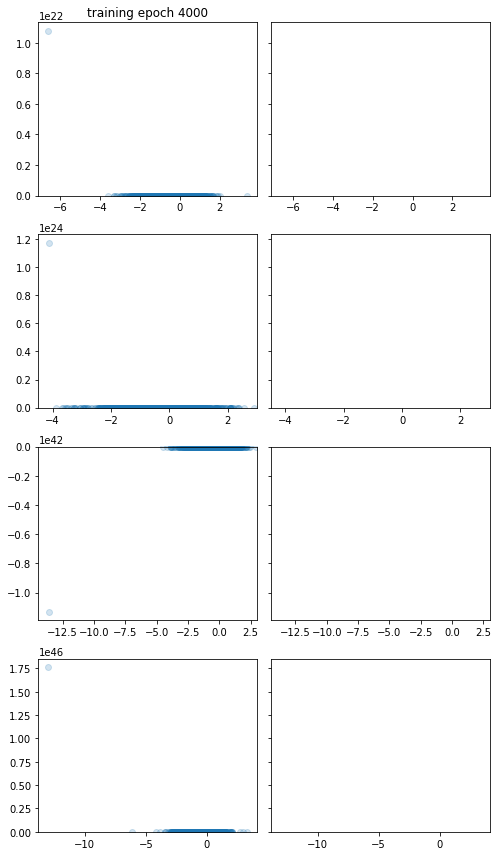

loss: nan, mean log p_x nan:  40%|████      | 4003/10000 [11:13<27:52,  3.58it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4005/10000 [11:13<19:28,  5.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4007/10000 [11:13<15:18,  6.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4009/10000 [11:13<13:30,  7.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4011/10000 [11:14<12:44,  7.84it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4013/10000 [11:14<12:17,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4015/10000 [11:14<12:00,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4017/10000 [11:14<11:56,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4019/10000 [11:15<11:57,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4021/10000 [11:15<11:54,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4023/10000 [11:15<11:47,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4025/10000 [11:15<11:46,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4027/10000 [11:16<11:53,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4029/10000 [11:16<11:51,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4031/10000 [11:16<11:53,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4033/10000 [11:16<12:03,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4035/10000 [11:16<12:01,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4037/10000 [11:17<11:53,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4039/10000 [11:17<11:46,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4041/10000 [11:17<11:50,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4043/10000 [11:17<11:56,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4045/10000 [11:18<11:59,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4047/10000 [11:18<13:04,  7.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  40%|████      | 4048/10000 [11:18<13:50,  7.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4051/10000 [11:19<13:00,  7.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4053/10000 [11:19<12:27,  7.95it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4055/10000 [11:19<12:04,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4057/10000 [11:19<11:51,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4059/10000 [11:19<11:49,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4061/10000 [11:20<11:45,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4063/10000 [11:20<11:45,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4064/10000 [11:20<12:24,  7.97it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4066/10000 [11:20<14:14,  6.94it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4068/10000 [11:21<15:10,  6.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4070/10000 [11:21<15:27,  6.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4073/10000 [11:21<13:35,  7.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4075/10000 [11:22<12:49,  7.70it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4077/10000 [11:22<12:19,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4079/10000 [11:22<12:01,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4081/10000 [11:22<11:57,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4083/10000 [11:23<11:52,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4085/10000 [11:23<11:56,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4087/10000 [11:23<11:49,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4089/10000 [11:23<11:42,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4091/10000 [11:24<11:48,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4093/10000 [11:24<12:05,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4095/10000 [11:24<11:51,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4096/10000 [11:24<11:49,  8.32it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4099/10000 [11:25<13:07,  7.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4100/10000 [11:25<13:17,  7.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4103/10000 [11:25<14:17,  6.88it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4105/10000 [11:26<13:14,  7.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4107/10000 [11:26<12:35,  7.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4109/10000 [11:26<12:10,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4111/10000 [11:26<12:44,  7.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4113/10000 [11:27<12:11,  8.05it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4115/10000 [11:27<11:56,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4117/10000 [11:27<11:54,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4119/10000 [11:27<11:48,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4121/10000 [11:28<12:02,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████      | 4123/10000 [11:28<12:03,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████▏     | 4125/10000 [11:28<11:56,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████▏     | 4127/10000 [11:28<11:43,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████▏     | 4129/10000 [11:28<11:47,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████▏     | 4131/10000 [11:29<11:41,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████▏     | 4133/10000 [11:29<11:55,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████▏     | 4135/10000 [11:29<11:48,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████▏     | 4137/10000 [11:29<11:44,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████▏     | 4139/10000 [11:30<11:41,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████▏     | 4141/10000 [11:30<11:41,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████▏     | 4143/10000 [11:30<11:40,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████▏     | 4145/10000 [11:30<11:38,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████▏     | 4147/10000 [11:31<11:38,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  41%|████▏     | 4149/10000 [11:31<11:23,  8.56it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4150/10000 [11:31<12:40,  7.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4153/10000 [11:31<12:30,  7.79it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4155/10000 [11:32<12:16,  7.93it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4157/10000 [11:32<11:57,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4159/10000 [11:32<11:43,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4161/10000 [11:32<11:47,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4163/10000 [11:33<11:44,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4165/10000 [11:33<11:39,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4167/10000 [11:33<11:40,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4169/10000 [11:33<11:31,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4171/10000 [11:34<11:34,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4173/10000 [11:34<11:31,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4175/10000 [11:34<11:42,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4177/10000 [11:34<11:35,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4179/10000 [11:35<11:36,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4181/10000 [11:35<11:33,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4183/10000 [11:35<11:31,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4185/10000 [11:35<11:29,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4187/10000 [11:35<11:31,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4189/10000 [11:36<11:34,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4191/10000 [11:36<11:34,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4193/10000 [11:36<12:06,  8.00it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4195/10000 [11:37<13:10,  7.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4197/10000 [11:37<12:28,  7.75it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4199/10000 [11:37<12:01,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4200/10000 [11:37<11:53,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4203/10000 [11:38<14:49,  6.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4204/10000 [11:38<15:05,  6.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4206/10000 [11:38<15:29,  6.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4208/10000 [11:38<15:31,  6.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4211/10000 [11:39<13:17,  7.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4212/10000 [11:39<13:25,  7.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4214/10000 [11:39<14:21,  6.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4216/10000 [11:40<14:56,  6.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4218/10000 [11:40<15:03,  6.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4220/10000 [11:40<15:11,  6.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4222/10000 [11:41<15:30,  6.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4224/10000 [11:41<15:39,  6.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4226/10000 [11:41<15:24,  6.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4229/10000 [11:42<13:16,  7.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4231/10000 [11:42<12:15,  7.85it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4233/10000 [11:42<11:48,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4235/10000 [11:42<11:34,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4237/10000 [11:43<11:27,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4239/10000 [11:43<11:23,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4241/10000 [11:43<11:13,  8.56it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4243/10000 [11:43<11:04,  8.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4245/10000 [11:44<11:07,  8.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4247/10000 [11:44<11:08,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  42%|████▏     | 4249/10000 [11:44<11:04,  8.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4251/10000 [11:44<11:16,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4253/10000 [11:44<11:17,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4255/10000 [11:45<11:25,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4257/10000 [11:45<11:20,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4259/10000 [11:45<11:24,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4261/10000 [11:45<11:23,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4263/10000 [11:46<11:27,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4265/10000 [11:46<11:40,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4267/10000 [11:46<11:37,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4269/10000 [11:46<11:41,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4272/10000 [11:47<13:34,  7.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4274/10000 [11:47<12:29,  7.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4276/10000 [11:47<11:59,  7.95it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4278/10000 [11:48<11:49,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4280/10000 [11:48<11:55,  7.99it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4282/10000 [11:48<11:40,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4284/10000 [11:48<11:43,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4286/10000 [11:49<11:58,  7.96it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4288/10000 [11:49<11:43,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4290/10000 [11:49<11:39,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4292/10000 [11:49<11:37,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4294/10000 [11:50<11:31,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4296/10000 [11:50<11:33,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4298/10000 [11:50<11:26,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4300/10000 [11:50<11:25,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4301/10000 [11:51<15:08,  6.28it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4303/10000 [11:51<12:53,  7.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4305/10000 [11:51<11:53,  7.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4307/10000 [11:51<11:21,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4308/10000 [11:51<12:30,  7.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4311/10000 [11:52<13:01,  7.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4313/10000 [11:52<12:08,  7.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4315/10000 [11:52<11:49,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4317/10000 [11:53<11:32,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4319/10000 [11:53<11:15,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4321/10000 [11:53<11:12,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4323/10000 [11:53<11:13,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4325/10000 [11:54<11:09,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4327/10000 [11:54<11:07,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4329/10000 [11:54<11:12,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4331/10000 [11:54<11:21,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4333/10000 [11:54<11:34,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4335/10000 [11:55<11:32,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4337/10000 [11:55<11:18,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4339/10000 [11:55<11:09,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4341/10000 [11:55<11:09,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4343/10000 [11:56<11:04,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4345/10000 [11:56<11:09,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4347/10000 [11:56<11:12,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  43%|████▎     | 4349/10000 [11:56<11:15,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▎     | 4351/10000 [11:57<11:11,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▎     | 4353/10000 [11:57<11:19,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▎     | 4355/10000 [11:57<11:13,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▎     | 4357/10000 [11:57<11:38,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▎     | 4359/10000 [11:58<11:26,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▎     | 4361/10000 [11:58<11:18,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▎     | 4363/10000 [11:58<11:16,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▎     | 4365/10000 [11:58<11:17,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▎     | 4367/10000 [11:59<12:16,  7.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▎     | 4368/10000 [11:59<13:06,  7.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▎     | 4371/10000 [11:59<12:16,  7.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▎     | 4373/10000 [11:59<12:00,  7.81it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4375/10000 [12:00<11:41,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4377/10000 [12:00<11:30,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4379/10000 [12:00<11:19,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4381/10000 [12:00<11:08,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4383/10000 [12:01<11:38,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4384/10000 [12:01<12:33,  7.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4386/10000 [12:01<13:46,  6.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4388/10000 [12:01<14:27,  6.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4390/10000 [12:02<14:40,  6.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4392/10000 [12:02<14:42,  6.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4395/10000 [12:02<12:49,  7.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4397/10000 [12:03<11:57,  7.81it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4399/10000 [12:03<11:33,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4400/10000 [12:03<11:22,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4403/10000 [12:04<13:06,  7.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4405/10000 [12:04<11:58,  7.79it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4407/10000 [12:04<11:23,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4409/10000 [12:04<11:06,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4411/10000 [12:04<11:25,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4413/10000 [12:05<11:18,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4415/10000 [12:05<11:13,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4417/10000 [12:05<11:06,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4419/10000 [12:05<11:08,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4421/10000 [12:06<11:07,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4423/10000 [12:06<11:00,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4425/10000 [12:06<11:05,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4427/10000 [12:06<11:33,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4429/10000 [12:07<11:20,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4431/10000 [12:07<11:22,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4433/10000 [12:07<11:22,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4435/10000 [12:07<11:10,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4437/10000 [12:08<11:02,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4439/10000 [12:08<11:05,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4441/10000 [12:08<11:58,  7.74it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4443/10000 [12:08<11:30,  8.05it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4445/10000 [12:09<11:23,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4447/10000 [12:09<11:08,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  44%|████▍     | 4449/10000 [12:09<11:10,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4451/10000 [12:09<11:08,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4453/10000 [12:10<11:12,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4455/10000 [12:10<11:12,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4457/10000 [12:10<11:01,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4459/10000 [12:10<11:03,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4461/10000 [12:11<10:59,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4463/10000 [12:11<11:59,  7.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4464/10000 [12:11<12:50,  7.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4466/10000 [12:11<13:45,  6.70it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4469/10000 [12:12<12:29,  7.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4471/10000 [12:12<11:44,  7.85it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4472/10000 [12:12<12:35,  7.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4475/10000 [12:12<12:00,  7.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4477/10000 [12:13<11:23,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4479/10000 [12:13<11:07,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4481/10000 [12:13<10:57,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4483/10000 [12:13<10:51,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4485/10000 [12:14<10:51,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4487/10000 [12:14<10:52,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4489/10000 [12:14<10:48,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4491/10000 [12:14<10:50,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4493/10000 [12:15<11:03,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4495/10000 [12:15<11:04,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4497/10000 [12:15<11:04,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▍     | 4499/10000 [12:15<11:03,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4500/10000 [12:16<11:03,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4503/10000 [12:16<12:44,  7.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4505/10000 [12:16<11:52,  7.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4507/10000 [12:16<11:27,  7.99it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4509/10000 [12:17<11:09,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4511/10000 [12:17<10:59,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4513/10000 [12:17<10:50,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4515/10000 [12:17<10:51,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4517/10000 [12:18<10:38,  8.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4519/10000 [12:18<10:33,  8.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4521/10000 [12:18<10:27,  8.73it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4523/10000 [12:18<10:24,  8.77it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4525/10000 [12:19<10:24,  8.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4527/10000 [12:19<10:45,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4529/10000 [12:19<10:45,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4531/10000 [12:19<10:57,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4533/10000 [12:19<10:53,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4535/10000 [12:20<11:13,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4536/10000 [12:20<12:17,  7.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4539/10000 [12:20<12:09,  7.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4541/10000 [12:21<11:30,  7.91it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4543/10000 [12:21<11:31,  7.89it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4544/10000 [12:21<12:22,  7.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4547/10000 [12:21<11:56,  7.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  45%|████▌     | 4549/10000 [12:22<11:17,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4551/10000 [12:22<11:00,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4553/10000 [12:22<10:49,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4555/10000 [12:22<10:44,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4557/10000 [12:23<10:46,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4559/10000 [12:23<10:40,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4561/10000 [12:23<10:37,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4563/10000 [12:23<10:42,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4565/10000 [12:23<10:47,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4567/10000 [12:24<10:47,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4569/10000 [12:24<10:49,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4571/10000 [12:24<10:51,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4573/10000 [12:24<10:47,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4575/10000 [12:25<10:48,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4577/10000 [12:25<10:48,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4579/10000 [12:25<10:42,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4581/10000 [12:25<11:00,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4583/10000 [12:26<10:59,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4585/10000 [12:26<11:01,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4587/10000 [12:26<11:00,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4589/10000 [12:26<10:55,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4591/10000 [12:27<10:57,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4594/10000 [12:27<12:13,  7.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4596/10000 [12:27<11:34,  7.78it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4598/10000 [12:28<11:30,  7.83it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4600/10000 [12:28<11:07,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4601/10000 [12:28<14:41,  6.13it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4603/10000 [12:28<12:38,  7.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4605/10000 [12:29<11:38,  7.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4607/10000 [12:29<11:20,  7.92it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4608/10000 [12:29<12:32,  7.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4611/10000 [12:29<11:56,  7.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4613/10000 [12:30<11:25,  7.86it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4615/10000 [12:30<11:12,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4617/10000 [12:30<11:13,  8.00it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4618/10000 [12:30<12:09,  7.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4621/10000 [12:31<12:20,  7.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▌     | 4623/10000 [12:31<11:25,  7.85it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▋     | 4625/10000 [12:31<11:04,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▋     | 4627/10000 [12:31<10:54,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▋     | 4629/10000 [12:32<10:52,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▋     | 4631/10000 [12:32<10:48,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▋     | 4633/10000 [12:32<10:43,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▋     | 4635/10000 [12:32<10:47,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▋     | 4637/10000 [12:33<10:47,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▋     | 4639/10000 [12:33<10:41,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▋     | 4641/10000 [12:33<10:41,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▋     | 4643/10000 [12:33<10:45,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▋     | 4645/10000 [12:34<11:03,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▋     | 4647/10000 [12:34<10:57,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  46%|████▋     | 4649/10000 [12:34<10:48,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4651/10000 [12:34<10:52,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4653/10000 [12:35<10:41,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4655/10000 [12:35<10:34,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4657/10000 [12:35<11:04,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4659/10000 [12:35<11:11,  7.95it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4661/10000 [12:36<10:57,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4663/10000 [12:36<10:56,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4665/10000 [12:36<10:52,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4667/10000 [12:36<10:58,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4669/10000 [12:37<10:53,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4671/10000 [12:37<10:44,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4673/10000 [12:37<10:40,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4675/10000 [12:37<10:44,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4677/10000 [12:37<10:28,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4679/10000 [12:38<10:22,  8.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4681/10000 [12:38<10:26,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4683/10000 [12:38<10:22,  8.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4685/10000 [12:38<10:35,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4687/10000 [12:39<10:46,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4689/10000 [12:39<10:39,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4691/10000 [12:39<10:36,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4693/10000 [12:39<10:30,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4695/10000 [12:40<10:45,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4697/10000 [12:40<10:27,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4699/10000 [12:40<10:34,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4700/10000 [12:40<10:31,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4703/10000 [12:41<12:15,  7.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4705/10000 [12:41<11:19,  7.79it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4707/10000 [12:41<10:42,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4709/10000 [12:41<10:19,  8.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4711/10000 [12:42<10:11,  8.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4713/10000 [12:42<10:04,  8.75it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4715/10000 [12:42<10:02,  8.77it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4717/10000 [12:42<10:16,  8.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4719/10000 [12:43<10:25,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4721/10000 [12:43<10:28,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4723/10000 [12:43<10:33,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4725/10000 [12:43<10:33,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4727/10000 [12:44<10:25,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4729/10000 [12:44<10:23,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4731/10000 [12:44<10:26,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4733/10000 [12:44<10:25,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4735/10000 [12:44<10:26,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4737/10000 [12:45<10:42,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4739/10000 [12:45<10:37,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4741/10000 [12:45<10:58,  7.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4743/10000 [12:45<10:49,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4745/10000 [12:46<10:39,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4747/10000 [12:46<10:37,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  47%|████▋     | 4749/10000 [12:46<11:41,  7.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4751/10000 [12:47<11:16,  7.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4753/10000 [12:47<10:58,  7.96it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4755/10000 [12:47<10:48,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4757/10000 [12:47<10:39,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4758/10000 [12:47<10:46,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4760/10000 [12:48<12:31,  6.97it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4763/10000 [12:48<11:49,  7.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4765/10000 [12:48<11:13,  7.77it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4767/10000 [12:49<11:20,  7.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4769/10000 [12:49<11:48,  7.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4771/10000 [12:49<11:09,  7.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4773/10000 [12:49<10:47,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4775/10000 [12:50<11:25,  7.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4777/10000 [12:50<11:02,  7.89it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4779/10000 [12:50<10:43,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4781/10000 [12:50<10:36,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4783/10000 [12:51<10:37,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4785/10000 [12:51<10:27,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4787/10000 [12:51<10:31,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4789/10000 [12:51<10:39,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4791/10000 [12:52<10:34,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4793/10000 [12:52<10:32,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4795/10000 [12:52<10:28,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4797/10000 [12:52<10:27,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4799/10000 [12:53<10:42,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4800/10000 [12:53<10:39,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4803/10000 [12:53<12:16,  7.05it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4805/10000 [12:53<11:21,  7.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4807/10000 [12:54<10:55,  7.92it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4809/10000 [12:54<10:35,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4811/10000 [12:54<10:24,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4813/10000 [12:54<10:21,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4815/10000 [12:55<10:33,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4817/10000 [12:55<10:37,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4819/10000 [12:55<11:30,  7.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4820/10000 [12:55<12:14,  7.05it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4822/10000 [12:56<12:59,  6.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4825/10000 [12:56<12:30,  6.90it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4827/10000 [12:56<11:24,  7.56it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4829/10000 [12:57<10:52,  7.93it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4831/10000 [12:57<10:39,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4833/10000 [12:57<10:28,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4835/10000 [12:57<10:24,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4837/10000 [12:58<10:26,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4839/10000 [12:58<10:23,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4841/10000 [12:58<10:21,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4843/10000 [12:58<10:19,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4845/10000 [12:58<10:18,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4847/10000 [12:59<10:12,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  48%|████▊     | 4849/10000 [12:59<10:13,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▊     | 4851/10000 [12:59<10:15,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▊     | 4853/10000 [12:59<10:15,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▊     | 4855/10000 [13:00<10:12,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▊     | 4857/10000 [13:00<10:05,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▊     | 4859/10000 [13:00<10:10,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▊     | 4861/10000 [13:00<10:22,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▊     | 4863/10000 [13:01<10:07,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▊     | 4865/10000 [13:01<10:00,  8.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▊     | 4867/10000 [13:01<09:57,  8.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▊     | 4869/10000 [13:01<09:56,  8.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▊     | 4871/10000 [13:02<09:50,  8.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▊     | 4873/10000 [13:02<09:50,  8.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4875/10000 [13:02<09:55,  8.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4877/10000 [13:02<09:59,  8.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4879/10000 [13:02<10:02,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4881/10000 [13:03<10:08,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4883/10000 [13:03<10:16,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4885/10000 [13:03<10:05,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4887/10000 [13:03<09:55,  8.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4889/10000 [13:04<09:51,  8.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4891/10000 [13:04<09:46,  8.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4893/10000 [13:04<09:41,  8.78it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4895/10000 [13:04<09:41,  8.77it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4897/10000 [13:05<09:43,  8.75it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4899/10000 [13:05<09:39,  8.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4900/10000 [13:05<09:43,  8.74it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4903/10000 [13:05<11:23,  7.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4905/10000 [13:06<10:37,  8.00it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4907/10000 [13:06<10:04,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4909/10000 [13:06<09:50,  8.63it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4911/10000 [13:06<09:51,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4913/10000 [13:07<09:46,  8.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4915/10000 [13:07<09:41,  8.74it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4917/10000 [13:07<09:49,  8.63it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4919/10000 [13:07<10:11,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4921/10000 [13:07<10:03,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4923/10000 [13:08<09:50,  8.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4925/10000 [13:08<09:45,  8.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4927/10000 [13:08<09:58,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4929/10000 [13:08<09:58,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4931/10000 [13:09<09:59,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4933/10000 [13:09<10:02,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4935/10000 [13:09<10:05,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4937/10000 [13:09<10:06,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4939/10000 [13:10<10:03,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4941/10000 [13:10<10:00,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4943/10000 [13:10<10:50,  7.77it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4945/10000 [13:10<10:16,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4947/10000 [13:11<10:16,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  49%|████▉     | 4949/10000 [13:11<10:12,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4951/10000 [13:11<10:27,  8.05it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4953/10000 [13:11<10:16,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4955/10000 [13:12<10:05,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4957/10000 [13:12<10:00,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4959/10000 [13:12<09:44,  8.63it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4961/10000 [13:12<09:40,  8.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4963/10000 [13:13<10:05,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4965/10000 [13:13<10:06,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4967/10000 [13:13<09:48,  8.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4969/10000 [13:13<09:49,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4971/10000 [13:13<09:41,  8.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4973/10000 [13:14<09:32,  8.78it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4975/10000 [13:14<09:43,  8.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4977/10000 [13:14<09:46,  8.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4979/10000 [13:14<09:34,  8.74it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4981/10000 [13:15<09:37,  8.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4983/10000 [13:15<09:34,  8.73it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4985/10000 [13:15<09:32,  8.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4987/10000 [13:15<09:48,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4989/10000 [13:16<09:43,  8.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4991/10000 [13:16<09:43,  8.58it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4993/10000 [13:16<09:57,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4995/10000 [13:16<10:00,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4997/10000 [13:16<10:08,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|████▉     | 4999/10000 [13:17<10:02,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5000/10000 [13:17<10:00,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5003/10000 [13:17<11:48,  7.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5005/10000 [13:18<11:04,  7.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5007/10000 [13:18<10:31,  7.90it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5009/10000 [13:18<10:18,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5011/10000 [13:18<10:08,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5013/10000 [13:19<10:10,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5015/10000 [13:19<10:08,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5017/10000 [13:19<09:59,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5019/10000 [13:19<10:03,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5021/10000 [13:20<10:01,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5023/10000 [13:20<09:48,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5025/10000 [13:20<09:44,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5027/10000 [13:20<09:53,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5029/10000 [13:20<09:52,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5031/10000 [13:21<10:08,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5033/10000 [13:21<10:02,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5035/10000 [13:21<10:04,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5037/10000 [13:21<10:00,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5039/10000 [13:22<09:55,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5041/10000 [13:22<09:52,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5043/10000 [13:22<09:45,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5045/10000 [13:22<09:45,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5047/10000 [13:23<09:47,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  50%|█████     | 5049/10000 [13:23<10:06,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5051/10000 [13:23<09:59,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5053/10000 [13:23<09:55,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5055/10000 [13:24<09:47,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5057/10000 [13:24<09:43,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5059/10000 [13:24<09:47,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5061/10000 [13:24<09:41,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5063/10000 [13:25<10:28,  7.86it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5064/10000 [13:25<11:16,  7.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5066/10000 [13:25<12:06,  6.79it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5068/10000 [13:25<12:37,  6.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5070/10000 [13:26<12:50,  6.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5073/10000 [13:26<11:15,  7.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5075/10000 [13:26<10:28,  7.83it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5077/10000 [13:27<10:00,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5079/10000 [13:27<09:51,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5081/10000 [13:27<09:44,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5083/10000 [13:27<09:45,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5085/10000 [13:28<09:47,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5087/10000 [13:28<09:59,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5089/10000 [13:28<09:54,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5091/10000 [13:28<09:53,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5093/10000 [13:28<09:51,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5095/10000 [13:29<09:53,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5097/10000 [13:29<09:49,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5099/10000 [13:29<09:52,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5100/10000 [13:29<09:57,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5103/10000 [13:30<11:38,  7.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5105/10000 [13:30<10:39,  7.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5107/10000 [13:30<10:14,  7.97it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5109/10000 [13:31<10:51,  7.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5111/10000 [13:31<10:25,  7.81it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5113/10000 [13:31<10:05,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5115/10000 [13:31<10:06,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5117/10000 [13:32<09:57,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5119/10000 [13:32<09:58,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5121/10000 [13:32<09:49,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████     | 5123/10000 [13:32<09:54,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████▏    | 5125/10000 [13:33<09:49,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████▏    | 5127/10000 [13:33<09:47,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████▏    | 5129/10000 [13:33<09:43,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████▏    | 5131/10000 [13:33<09:47,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████▏    | 5133/10000 [13:34<09:51,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████▏    | 5135/10000 [13:34<09:43,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████▏    | 5137/10000 [13:34<09:36,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████▏    | 5139/10000 [13:34<09:24,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████▏    | 5141/10000 [13:34<09:23,  8.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████▏    | 5143/10000 [13:35<09:21,  8.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████▏    | 5145/10000 [13:35<09:20,  8.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████▏    | 5147/10000 [13:35<09:17,  8.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  51%|█████▏    | 5149/10000 [13:35<09:30,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5151/10000 [13:36<09:40,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5153/10000 [13:36<09:49,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5155/10000 [13:36<09:46,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5157/10000 [13:36<09:34,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5159/10000 [13:37<09:23,  8.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5161/10000 [13:37<09:17,  8.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5163/10000 [13:37<09:16,  8.70it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5165/10000 [13:37<09:20,  8.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5167/10000 [13:37<09:17,  8.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5169/10000 [13:38<10:18,  7.81it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5171/10000 [13:38<09:56,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5173/10000 [13:38<09:47,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5175/10000 [13:38<09:45,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5177/10000 [13:39<09:42,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5179/10000 [13:39<09:37,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5181/10000 [13:39<09:34,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5183/10000 [13:39<09:29,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5185/10000 [13:40<09:22,  8.56it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5187/10000 [13:40<09:20,  8.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5189/10000 [13:40<09:16,  8.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5191/10000 [13:40<09:20,  8.58it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5193/10000 [13:41<09:42,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5195/10000 [13:41<09:36,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5197/10000 [13:41<09:41,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5199/10000 [13:41<09:31,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5200/10000 [13:42<09:23,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5203/10000 [13:42<10:49,  7.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5205/10000 [13:42<09:58,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5207/10000 [13:42<09:38,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5209/10000 [13:43<09:34,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5211/10000 [13:43<09:31,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5213/10000 [13:43<09:30,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5215/10000 [13:43<09:31,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5217/10000 [13:44<09:29,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5219/10000 [13:44<09:29,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5221/10000 [13:44<09:23,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5223/10000 [13:44<09:16,  8.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5226/10000 [13:45<10:24,  7.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5228/10000 [13:45<10:01,  7.94it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5230/10000 [13:45<09:45,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5232/10000 [13:45<09:42,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5234/10000 [13:46<09:36,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5236/10000 [13:46<09:30,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5238/10000 [13:46<09:40,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5240/10000 [13:46<09:41,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5242/10000 [13:47<09:39,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5244/10000 [13:47<09:24,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5246/10000 [13:47<09:15,  8.56it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▏    | 5248/10000 [13:47<09:26,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  52%|█████▎    | 5250/10000 [13:48<09:33,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5252/10000 [13:48<09:38,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5254/10000 [13:48<09:37,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5256/10000 [13:48<09:22,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5258/10000 [13:49<09:17,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5260/10000 [13:49<09:09,  8.63it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5262/10000 [13:49<09:16,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5264/10000 [13:49<09:16,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5266/10000 [13:49<09:15,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5268/10000 [13:50<09:18,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5269/10000 [13:50<09:23,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5272/10000 [13:50<11:06,  7.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5274/10000 [13:51<10:18,  7.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5276/10000 [13:51<09:50,  8.00it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5278/10000 [13:51<09:38,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5280/10000 [13:51<10:00,  7.86it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5282/10000 [13:52<09:47,  8.03it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5284/10000 [13:52<09:37,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5286/10000 [13:52<09:21,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5288/10000 [13:52<09:15,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5290/10000 [13:52<09:09,  8.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5292/10000 [13:53<09:20,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5294/10000 [13:53<09:08,  8.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5296/10000 [13:53<09:14,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5298/10000 [13:53<09:06,  8.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5300/10000 [13:54<09:01,  8.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5301/10000 [13:54<12:08,  6.45it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5303/10000 [13:54<10:49,  7.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5305/10000 [13:54<09:55,  7.89it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5307/10000 [13:55<09:22,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5309/10000 [13:55<09:09,  8.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5311/10000 [13:55<09:05,  8.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5313/10000 [13:55<08:58,  8.70it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5314/10000 [13:55<09:58,  7.83it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5317/10000 [13:56<10:10,  7.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5319/10000 [13:56<09:44,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5321/10000 [13:56<09:45,  7.99it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5323/10000 [13:57<09:30,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5324/10000 [13:57<10:15,  7.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5326/10000 [13:57<11:18,  6.89it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5328/10000 [13:57<11:48,  6.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5331/10000 [13:58<10:40,  7.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5333/10000 [13:58<09:54,  7.85it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5335/10000 [13:58<09:32,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5337/10000 [13:58<09:27,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5338/10000 [13:59<10:22,  7.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5340/10000 [13:59<11:25,  6.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5343/10000 [13:59<10:40,  7.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5345/10000 [14:00<09:59,  7.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5347/10000 [14:00<09:27,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  53%|█████▎    | 5349/10000 [14:00<09:18,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▎    | 5351/10000 [14:00<09:23,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▎    | 5353/10000 [14:01<09:32,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▎    | 5355/10000 [14:01<09:21,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▎    | 5356/10000 [14:01<10:25,  7.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▎    | 5358/10000 [14:01<11:24,  6.79it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▎    | 5360/10000 [14:02<11:55,  6.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▎    | 5362/10000 [14:02<12:08,  6.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▎    | 5364/10000 [14:02<12:13,  6.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▎    | 5366/10000 [14:03<12:13,  6.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▎    | 5369/10000 [14:03<10:42,  7.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▎    | 5371/10000 [14:03<10:14,  7.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▎    | 5373/10000 [14:03<09:48,  7.86it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5375/10000 [14:04<09:33,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5377/10000 [14:04<09:23,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5379/10000 [14:04<09:28,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5381/10000 [14:04<09:22,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5383/10000 [14:05<09:24,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5385/10000 [14:05<09:18,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5387/10000 [14:05<09:13,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5389/10000 [14:05<09:11,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5391/10000 [14:06<09:23,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5393/10000 [14:06<09:13,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5395/10000 [14:06<09:10,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5397/10000 [14:06<09:13,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5399/10000 [14:07<09:18,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5400/10000 [14:07<09:13,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5403/10000 [14:07<10:47,  7.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5405/10000 [14:07<09:56,  7.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5407/10000 [14:08<09:27,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5409/10000 [14:08<09:14,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5411/10000 [14:08<09:08,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5413/10000 [14:08<09:08,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5415/10000 [14:09<09:05,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5417/10000 [14:09<09:03,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5419/10000 [14:09<09:00,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5421/10000 [14:09<09:03,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5423/10000 [14:10<09:07,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5425/10000 [14:10<09:11,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5427/10000 [14:10<09:26,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5429/10000 [14:10<09:19,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5431/10000 [14:11<09:20,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5433/10000 [14:11<09:22,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5435/10000 [14:11<09:17,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5437/10000 [14:11<09:14,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5439/10000 [14:12<09:14,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5441/10000 [14:12<09:10,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5443/10000 [14:12<09:35,  7.91it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5445/10000 [14:12<09:28,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5447/10000 [14:13<09:19,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  54%|█████▍    | 5449/10000 [14:13<09:19,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5451/10000 [14:13<09:12,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5453/10000 [14:13<09:13,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5455/10000 [14:14<09:10,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5457/10000 [14:14<09:06,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5459/10000 [14:14<09:11,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5461/10000 [14:14<09:09,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5463/10000 [14:15<09:08,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5465/10000 [14:15<09:05,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5467/10000 [14:15<09:03,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5469/10000 [14:15<09:08,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5471/10000 [14:15<09:24,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5473/10000 [14:16<09:17,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5475/10000 [14:16<09:09,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5477/10000 [14:16<09:08,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5479/10000 [14:16<09:08,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5481/10000 [14:17<09:09,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5483/10000 [14:17<09:12,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5485/10000 [14:17<09:04,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5487/10000 [14:17<09:04,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5489/10000 [14:18<09:05,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5491/10000 [14:18<09:01,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5493/10000 [14:18<09:00,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5495/10000 [14:18<09:00,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5497/10000 [14:19<09:06,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▍    | 5498/10000 [14:19<09:59,  7.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5500/10000 [14:19<10:56,  6.85it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5503/10000 [14:20<11:20,  6.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5505/10000 [14:20<10:04,  7.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5507/10000 [14:20<09:26,  7.93it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5509/10000 [14:20<09:22,  7.99it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5511/10000 [14:21<09:15,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5513/10000 [14:21<09:04,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5515/10000 [14:21<09:01,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5517/10000 [14:21<09:04,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5519/10000 [14:22<09:00,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5521/10000 [14:22<09:02,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5523/10000 [14:22<08:58,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5525/10000 [14:22<08:58,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5527/10000 [14:23<09:00,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5529/10000 [14:23<09:03,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5531/10000 [14:23<08:59,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5533/10000 [14:23<08:56,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5535/10000 [14:23<08:57,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5537/10000 [14:24<08:52,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5539/10000 [14:24<08:57,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5541/10000 [14:24<08:46,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5543/10000 [14:24<08:47,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5545/10000 [14:25<08:48,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5547/10000 [14:25<08:46,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  55%|█████▌    | 5549/10000 [14:25<08:51,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5551/10000 [14:25<08:54,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5553/10000 [14:26<09:05,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5555/10000 [14:26<09:03,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5557/10000 [14:26<08:56,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5559/10000 [14:26<08:57,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5561/10000 [14:27<08:55,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5563/10000 [14:27<08:52,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5565/10000 [14:27<08:50,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5567/10000 [14:27<08:44,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5569/10000 [14:28<08:44,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5571/10000 [14:28<08:45,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5573/10000 [14:28<08:37,  8.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5575/10000 [14:28<08:31,  8.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5577/10000 [14:28<08:35,  8.58it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5579/10000 [14:29<08:36,  8.56it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5581/10000 [14:29<08:31,  8.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5583/10000 [14:29<08:36,  8.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5585/10000 [14:29<08:36,  8.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5587/10000 [14:30<08:31,  8.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5589/10000 [14:30<08:23,  8.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5591/10000 [14:30<08:37,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5593/10000 [14:30<08:42,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5595/10000 [14:31<09:17,  7.90it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5597/10000 [14:31<09:06,  8.05it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5599/10000 [14:31<09:05,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5600/10000 [14:31<10:11,  7.19it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5600/10000 [14:31<10:11,  7.19it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5602/10000 [14:32<15:32,  4.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5604/10000 [14:32<13:59,  5.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5606/10000 [14:33<12:47,  5.73it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5608/10000 [14:33<12:13,  5.99it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5611/10000 [14:33<10:58,  6.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5613/10000 [14:34<10:05,  7.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5615/10000 [14:34<09:27,  7.73it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5617/10000 [14:34<09:04,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5619/10000 [14:34<08:56,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5621/10000 [14:35<08:52,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▌    | 5623/10000 [14:35<08:47,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▋    | 5625/10000 [14:35<08:43,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▋    | 5627/10000 [14:35<08:43,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▋    | 5628/10000 [14:35<09:34,  7.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▋    | 5631/10000 [14:36<09:21,  7.78it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▋    | 5633/10000 [14:36<09:06,  7.99it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▋    | 5635/10000 [14:36<09:01,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▋    | 5637/10000 [14:37<08:55,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▋    | 5639/10000 [14:37<08:47,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▋    | 5641/10000 [14:37<08:44,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▋    | 5643/10000 [14:37<08:43,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▋    | 5645/10000 [14:37<08:43,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▋    | 5647/10000 [14:38<08:44,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  56%|█████▋    | 5649/10000 [14:38<08:41,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5651/10000 [14:38<08:36,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5653/10000 [14:38<08:32,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5655/10000 [14:39<08:37,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5657/10000 [14:39<08:41,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5659/10000 [14:39<08:59,  8.05it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5661/10000 [14:39<08:52,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5663/10000 [14:40<08:43,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5665/10000 [14:40<08:46,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5667/10000 [14:40<08:53,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5669/10000 [14:40<08:45,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5671/10000 [14:41<08:43,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5673/10000 [14:41<08:45,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5675/10000 [14:41<08:43,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5677/10000 [14:41<09:04,  7.94it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5679/10000 [14:42<08:56,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5681/10000 [14:42<08:59,  8.00it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5683/10000 [14:42<09:11,  7.83it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5685/10000 [14:42<09:00,  7.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5687/10000 [14:43<09:02,  7.94it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5689/10000 [14:43<08:48,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5691/10000 [14:43<08:52,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5693/10000 [14:43<08:51,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5695/10000 [14:44<08:45,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5697/10000 [14:44<08:34,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5699/10000 [14:44<08:30,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5700/10000 [14:44<08:30,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5703/10000 [14:45<09:57,  7.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5705/10000 [14:45<09:33,  7.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5707/10000 [14:45<09:03,  7.89it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5709/10000 [14:45<08:52,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5711/10000 [14:46<08:40,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5713/10000 [14:46<08:32,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5715/10000 [14:46<08:32,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5717/10000 [14:46<08:19,  8.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5719/10000 [14:47<08:25,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5721/10000 [14:47<08:24,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5723/10000 [14:47<08:36,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5725/10000 [14:47<08:39,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5727/10000 [14:48<08:39,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5729/10000 [14:48<08:50,  8.05it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5731/10000 [14:48<08:44,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5733/10000 [14:48<08:40,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5735/10000 [14:49<08:36,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5737/10000 [14:49<08:33,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5739/10000 [14:49<08:31,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5741/10000 [14:49<08:29,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5743/10000 [14:50<08:24,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5745/10000 [14:50<08:40,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5747/10000 [14:50<08:37,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  57%|█████▋    | 5749/10000 [14:50<08:35,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5751/10000 [14:50<08:27,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5753/10000 [14:51<08:42,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5755/10000 [14:51<08:38,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5757/10000 [14:51<08:33,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5759/10000 [14:51<08:32,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5761/10000 [14:52<08:39,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5763/10000 [14:52<08:43,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5765/10000 [14:52<08:47,  8.03it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5767/10000 [14:52<09:10,  7.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5769/10000 [14:53<08:50,  7.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5771/10000 [14:53<08:40,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5773/10000 [14:53<08:29,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5775/10000 [14:53<08:27,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5777/10000 [14:54<08:25,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5779/10000 [14:54<08:14,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5781/10000 [14:54<08:15,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5783/10000 [14:54<08:18,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5785/10000 [14:55<08:21,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5787/10000 [14:55<08:23,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5789/10000 [14:55<08:26,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5791/10000 [14:55<08:28,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5793/10000 [14:56<08:27,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5795/10000 [14:56<08:24,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5797/10000 [14:56<08:24,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5799/10000 [14:56<08:22,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5800/10000 [14:57<08:22,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5803/10000 [14:57<09:49,  7.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5805/10000 [14:57<09:23,  7.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5807/10000 [14:57<09:01,  7.74it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5809/10000 [14:58<08:42,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5811/10000 [14:58<08:36,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5813/10000 [14:58<08:33,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5815/10000 [14:58<08:25,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5817/10000 [14:59<08:15,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5819/10000 [14:59<08:13,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5821/10000 [14:59<08:09,  8.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5823/10000 [14:59<08:10,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5825/10000 [15:00<08:09,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5827/10000 [15:00<08:12,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5829/10000 [15:00<08:13,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5831/10000 [15:00<08:12,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5833/10000 [15:01<08:13,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5835/10000 [15:01<08:12,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5837/10000 [15:01<08:12,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5839/10000 [15:01<08:14,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5841/10000 [15:01<08:09,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5843/10000 [15:02<08:06,  8.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5845/10000 [15:02<08:09,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5847/10000 [15:02<08:10,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  58%|█████▊    | 5849/10000 [15:02<08:22,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▊    | 5851/10000 [15:03<08:18,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▊    | 5853/10000 [15:03<08:14,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▊    | 5855/10000 [15:03<08:14,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▊    | 5857/10000 [15:03<08:23,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▊    | 5859/10000 [15:04<08:20,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▊    | 5861/10000 [15:04<08:15,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▊    | 5863/10000 [15:04<08:09,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▊    | 5865/10000 [15:04<08:06,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▊    | 5867/10000 [15:05<07:55,  8.70it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▊    | 5869/10000 [15:05<07:56,  8.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▊    | 5871/10000 [15:05<07:50,  8.77it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▊    | 5873/10000 [15:05<07:49,  8.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5875/10000 [15:06<08:35,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5877/10000 [15:06<08:23,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5879/10000 [15:06<08:16,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5881/10000 [15:06<08:24,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5883/10000 [15:06<08:37,  7.96it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5885/10000 [15:07<08:21,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5887/10000 [15:07<08:02,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5889/10000 [15:07<07:52,  8.70it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5891/10000 [15:07<08:07,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5893/10000 [15:08<08:05,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5895/10000 [15:08<07:56,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5897/10000 [15:08<07:50,  8.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5899/10000 [15:08<07:50,  8.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5900/10000 [15:09<07:50,  8.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5903/10000 [15:09<09:06,  7.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5905/10000 [15:09<08:22,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5907/10000 [15:09<08:09,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5909/10000 [15:10<07:53,  8.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5911/10000 [15:10<07:51,  8.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5913/10000 [15:10<07:49,  8.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5915/10000 [15:10<08:01,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5917/10000 [15:11<08:04,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5919/10000 [15:11<08:03,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5921/10000 [15:11<07:50,  8.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5923/10000 [15:11<07:51,  8.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5925/10000 [15:11<07:48,  8.70it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5927/10000 [15:12<07:51,  8.63it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5929/10000 [15:12<07:56,  8.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5931/10000 [15:12<08:04,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5933/10000 [15:12<08:05,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5935/10000 [15:13<08:13,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5937/10000 [15:13<08:20,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5939/10000 [15:13<08:26,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5941/10000 [15:13<08:12,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5943/10000 [15:14<08:05,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5945/10000 [15:14<08:02,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5947/10000 [15:14<08:07,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  59%|█████▉    | 5949/10000 [15:14<08:09,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5951/10000 [15:15<08:17,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5953/10000 [15:15<08:10,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5955/10000 [15:15<08:02,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5957/10000 [15:15<07:57,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5959/10000 [15:16<07:48,  8.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5961/10000 [15:16<07:53,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5963/10000 [15:16<07:54,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5965/10000 [15:16<07:53,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5967/10000 [15:17<08:16,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5969/10000 [15:17<08:06,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5971/10000 [15:17<07:59,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5973/10000 [15:17<07:52,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5975/10000 [15:17<08:03,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5977/10000 [15:18<08:05,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5979/10000 [15:18<08:08,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5981/10000 [15:18<08:05,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5983/10000 [15:18<08:04,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5985/10000 [15:19<08:04,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5987/10000 [15:19<08:01,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5989/10000 [15:19<07:57,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5991/10000 [15:19<07:59,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5993/10000 [15:20<07:56,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5995/10000 [15:20<07:59,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5997/10000 [15:20<08:00,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|█████▉    | 5999/10000 [15:20<08:03,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6000/10000 [15:21<08:07,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


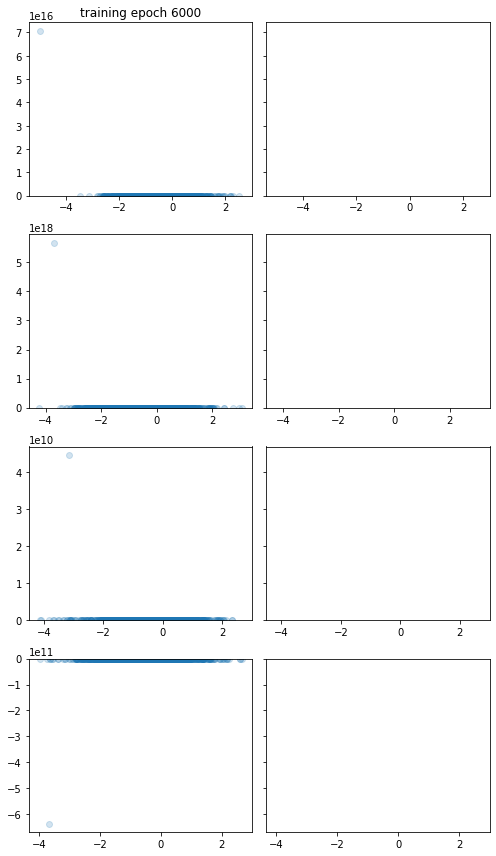

loss: nan, mean log p_x nan:  60%|██████    | 6003/10000 [15:22<17:38,  3.78it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6005/10000 [15:22<12:44,  5.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6007/10000 [15:22<10:18,  6.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6009/10000 [15:23<09:03,  7.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6011/10000 [15:23<08:40,  7.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6013/10000 [15:23<08:17,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6015/10000 [15:23<09:06,  7.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6017/10000 [15:24<08:47,  7.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6019/10000 [15:24<08:15,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6021/10000 [15:24<08:05,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6023/10000 [15:24<07:51,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6025/10000 [15:25<08:37,  7.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6027/10000 [15:25<08:45,  7.56it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6029/10000 [15:25<08:24,  7.87it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6031/10000 [15:25<08:22,  7.90it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6033/10000 [15:26<08:09,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6035/10000 [15:26<08:02,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6037/10000 [15:26<07:53,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6039/10000 [15:26<07:47,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6041/10000 [15:27<07:48,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6043/10000 [15:27<07:53,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6045/10000 [15:27<07:50,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6047/10000 [15:27<07:46,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  60%|██████    | 6049/10000 [15:27<07:46,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6051/10000 [15:28<07:48,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6053/10000 [15:28<07:52,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6055/10000 [15:28<07:52,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6057/10000 [15:28<07:58,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6059/10000 [15:29<07:57,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6061/10000 [15:29<07:55,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6063/10000 [15:29<07:51,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6065/10000 [15:29<07:51,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6067/10000 [15:30<07:47,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6069/10000 [15:30<07:45,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6071/10000 [15:30<07:46,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6073/10000 [15:30<07:44,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6075/10000 [15:31<07:49,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6077/10000 [15:31<07:51,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6079/10000 [15:31<07:50,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6081/10000 [15:31<07:51,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6083/10000 [15:32<07:53,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6085/10000 [15:32<07:52,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6087/10000 [15:32<07:48,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6089/10000 [15:32<07:53,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6091/10000 [15:33<07:49,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6093/10000 [15:33<07:47,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6095/10000 [15:33<07:49,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6097/10000 [15:33<07:46,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6099/10000 [15:33<07:53,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6100/10000 [15:34<07:52,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6103/10000 [15:34<09:47,  6.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6105/10000 [15:34<09:02,  7.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6107/10000 [15:35<08:23,  7.73it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6109/10000 [15:35<08:04,  8.03it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6111/10000 [15:35<07:53,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6113/10000 [15:35<08:04,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6115/10000 [15:36<07:59,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6117/10000 [15:36<07:50,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6119/10000 [15:36<07:46,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6121/10000 [15:36<07:49,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████    | 6123/10000 [15:37<07:47,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████▏   | 6125/10000 [15:37<07:47,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████▏   | 6127/10000 [15:37<07:41,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████▏   | 6129/10000 [15:37<07:50,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████▏   | 6131/10000 [15:38<07:48,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████▏   | 6133/10000 [15:38<07:50,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████▏   | 6135/10000 [15:38<07:46,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████▏   | 6137/10000 [15:38<07:38,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████▏   | 6139/10000 [15:38<07:37,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████▏   | 6141/10000 [15:39<07:35,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████▏   | 6143/10000 [15:39<07:38,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████▏   | 6145/10000 [15:39<07:37,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████▏   | 6147/10000 [15:39<07:46,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  61%|██████▏   | 6149/10000 [15:40<07:44,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6151/10000 [15:40<07:43,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6153/10000 [15:40<07:42,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6155/10000 [15:40<07:48,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6157/10000 [15:41<07:42,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6159/10000 [15:41<07:35,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6161/10000 [15:41<07:31,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6163/10000 [15:41<07:31,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6165/10000 [15:42<07:31,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6167/10000 [15:42<07:40,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6169/10000 [15:42<07:49,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6171/10000 [15:42<07:53,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6173/10000 [15:43<07:42,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6175/10000 [15:43<07:53,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6177/10000 [15:43<07:48,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6179/10000 [15:43<07:45,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6181/10000 [15:44<07:37,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6183/10000 [15:44<07:31,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6185/10000 [15:44<07:28,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6187/10000 [15:44<07:29,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6189/10000 [15:44<07:30,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6191/10000 [15:45<07:38,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6193/10000 [15:45<07:35,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6195/10000 [15:45<07:31,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6197/10000 [15:45<07:33,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6199/10000 [15:46<07:33,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6200/10000 [15:46<07:38,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6203/10000 [15:46<08:51,  7.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6205/10000 [15:47<08:08,  7.78it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6207/10000 [15:47<07:43,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6209/10000 [15:47<07:27,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6211/10000 [15:47<07:40,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6213/10000 [15:48<07:44,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6215/10000 [15:48<07:34,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6217/10000 [15:48<07:33,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6219/10000 [15:48<07:43,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6221/10000 [15:48<07:42,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6223/10000 [15:49<07:43,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6225/10000 [15:49<07:45,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6227/10000 [15:49<07:50,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6229/10000 [15:49<07:38,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6231/10000 [15:50<07:30,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6233/10000 [15:50<07:24,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6235/10000 [15:50<08:03,  7.79it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6236/10000 [15:50<08:15,  7.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6239/10000 [15:51<08:30,  7.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6241/10000 [15:51<07:59,  7.83it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6243/10000 [15:51<07:56,  7.88it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6245/10000 [15:52<07:44,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▏   | 6247/10000 [15:52<07:39,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  62%|██████▎   | 6250/10000 [15:52<08:24,  7.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6252/10000 [15:52<08:03,  7.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6253/10000 [15:53<08:41,  7.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6255/10000 [15:53<09:21,  6.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6257/10000 [15:53<09:40,  6.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6259/10000 [15:54<09:47,  6.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6262/10000 [15:54<08:35,  7.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6264/10000 [15:54<08:05,  7.70it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6266/10000 [15:54<07:46,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6268/10000 [15:55<07:44,  8.03it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6270/10000 [15:55<07:42,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6272/10000 [15:55<07:39,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6274/10000 [15:55<07:33,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6276/10000 [15:56<08:01,  7.73it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6278/10000 [15:56<07:40,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6280/10000 [15:56<07:26,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6282/10000 [15:56<07:22,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6284/10000 [15:57<07:20,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6285/10000 [15:57<08:13,  7.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6288/10000 [15:57<08:00,  7.73it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6290/10000 [15:57<07:41,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6292/10000 [15:58<07:32,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6294/10000 [15:58<07:29,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6296/10000 [15:58<07:27,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6298/10000 [15:58<07:34,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6300/10000 [15:59<07:25,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6301/10000 [15:59<09:58,  6.18it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6303/10000 [15:59<08:36,  7.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6305/10000 [15:59<07:59,  7.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6307/10000 [16:00<08:22,  7.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6308/10000 [16:00<08:48,  6.99it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6311/10000 [16:00<08:50,  6.95it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6313/10000 [16:01<08:00,  7.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6315/10000 [16:01<07:34,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6317/10000 [16:01<07:26,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6319/10000 [16:01<07:20,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6321/10000 [16:01<07:19,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6323/10000 [16:02<07:19,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6325/10000 [16:02<07:24,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6327/10000 [16:02<08:07,  7.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6328/10000 [16:02<08:36,  7.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6331/10000 [16:03<08:11,  7.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6333/10000 [16:03<07:47,  7.85it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6335/10000 [16:03<07:52,  7.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6337/10000 [16:04<07:36,  8.03it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6339/10000 [16:04<07:35,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6341/10000 [16:04<07:27,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6343/10000 [16:04<07:20,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6345/10000 [16:04<07:14,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6347/10000 [16:05<07:13,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  63%|██████▎   | 6349/10000 [16:05<07:15,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▎   | 6351/10000 [16:05<07:15,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▎   | 6353/10000 [16:05<07:07,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▎   | 6355/10000 [16:06<07:02,  8.63it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▎   | 6357/10000 [16:06<06:59,  8.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▎   | 6359/10000 [16:06<07:02,  8.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▎   | 6361/10000 [16:06<07:38,  7.94it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▎   | 6363/10000 [16:07<07:30,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▎   | 6365/10000 [16:07<07:22,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▎   | 6367/10000 [16:07<07:13,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▎   | 6369/10000 [16:07<07:10,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▎   | 6371/10000 [16:08<07:52,  7.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▎   | 6373/10000 [16:08<07:36,  7.95it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6375/10000 [16:08<07:21,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6377/10000 [16:08<07:30,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6379/10000 [16:09<07:18,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6381/10000 [16:09<07:10,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6383/10000 [16:09<07:07,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6386/10000 [16:10<07:49,  7.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6388/10000 [16:10<07:27,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6390/10000 [16:10<07:15,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6392/10000 [16:10<07:17,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6394/10000 [16:10<07:13,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6396/10000 [16:11<07:12,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6398/10000 [16:11<07:10,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6400/10000 [16:11<07:03,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6401/10000 [16:11<09:22,  6.39it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6403/10000 [16:12<08:13,  7.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6405/10000 [16:12<07:45,  7.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6407/10000 [16:12<07:34,  7.91it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6409/10000 [16:12<07:24,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6411/10000 [16:13<07:06,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6413/10000 [16:13<07:00,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6415/10000 [16:13<07:02,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6417/10000 [16:13<06:57,  8.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6419/10000 [16:14<07:01,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6421/10000 [16:14<07:03,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6423/10000 [16:14<07:00,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6425/10000 [16:14<07:01,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6427/10000 [16:15<07:46,  7.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6428/10000 [16:15<08:16,  7.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6431/10000 [16:15<07:44,  7.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6433/10000 [16:15<07:25,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6435/10000 [16:16<07:18,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6437/10000 [16:16<07:13,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6439/10000 [16:16<07:09,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6440/10000 [16:16<07:20,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6443/10000 [16:17<07:49,  7.58it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6445/10000 [16:17<07:34,  7.81it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6447/10000 [16:17<07:19,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  64%|██████▍   | 6449/10000 [16:17<07:14,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6451/10000 [16:18<07:35,  7.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6453/10000 [16:18<07:20,  8.05it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6455/10000 [16:18<07:12,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6457/10000 [16:18<06:58,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6459/10000 [16:19<07:22,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6461/10000 [16:19<07:13,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6463/10000 [16:19<07:04,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6465/10000 [16:19<07:11,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6467/10000 [16:20<07:07,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6469/10000 [16:20<07:03,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6471/10000 [16:20<07:05,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6473/10000 [16:20<06:59,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6475/10000 [16:20<06:55,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6477/10000 [16:21<06:59,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6479/10000 [16:21<07:02,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6481/10000 [16:21<07:01,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6483/10000 [16:21<07:01,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6485/10000 [16:22<07:02,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6487/10000 [16:22<07:02,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6489/10000 [16:22<06:57,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6491/10000 [16:22<07:01,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6493/10000 [16:23<07:01,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6495/10000 [16:23<07:00,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6497/10000 [16:23<07:02,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▍   | 6499/10000 [16:23<06:53,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6500/10000 [16:24<06:49,  8.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6503/10000 [16:24<07:55,  7.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6505/10000 [16:24<07:21,  7.92it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6507/10000 [16:24<07:04,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6509/10000 [16:25<06:59,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6511/10000 [16:25<07:02,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6513/10000 [16:25<06:55,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6515/10000 [16:25<06:48,  8.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6517/10000 [16:26<06:42,  8.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6519/10000 [16:26<06:41,  8.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6521/10000 [16:26<06:42,  8.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6523/10000 [16:26<06:44,  8.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6525/10000 [16:27<06:40,  8.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6527/10000 [16:27<06:37,  8.75it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6529/10000 [16:27<06:45,  8.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6531/10000 [16:27<06:40,  8.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6533/10000 [16:27<06:50,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6535/10000 [16:28<06:56,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6537/10000 [16:28<06:54,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6539/10000 [16:28<06:52,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6541/10000 [16:28<06:53,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6543/10000 [16:29<07:10,  8.03it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6545/10000 [16:29<06:59,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6547/10000 [16:29<06:51,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  65%|██████▌   | 6549/10000 [16:29<06:49,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6551/10000 [16:30<06:46,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6553/10000 [16:30<06:45,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6555/10000 [16:30<06:43,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6557/10000 [16:30<06:40,  8.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6559/10000 [16:31<06:43,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6561/10000 [16:31<06:44,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6563/10000 [16:31<06:45,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6565/10000 [16:31<06:48,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6567/10000 [16:32<06:51,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6569/10000 [16:32<06:48,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6571/10000 [16:32<06:50,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6573/10000 [16:32<06:54,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6575/10000 [16:32<06:57,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6577/10000 [16:33<06:52,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6579/10000 [16:33<06:47,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6581/10000 [16:33<06:54,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6583/10000 [16:33<06:56,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6585/10000 [16:34<06:52,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6587/10000 [16:34<06:57,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6589/10000 [16:34<06:51,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6591/10000 [16:34<06:56,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6593/10000 [16:35<06:50,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6595/10000 [16:35<06:46,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6597/10000 [16:35<06:52,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6599/10000 [16:35<06:51,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6600/10000 [16:36<06:49,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6603/10000 [16:36<08:07,  6.97it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6605/10000 [16:36<07:29,  7.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6607/10000 [16:37<07:19,  7.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6609/10000 [16:37<07:07,  7.94it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6611/10000 [16:37<07:34,  7.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6613/10000 [16:37<07:06,  7.93it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6615/10000 [16:38<06:54,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6617/10000 [16:38<06:52,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6619/10000 [16:38<07:03,  7.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6621/10000 [16:38<06:50,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▌   | 6623/10000 [16:38<06:44,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▋   | 6625/10000 [16:39<06:43,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▋   | 6627/10000 [16:39<06:47,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▋   | 6629/10000 [16:39<06:36,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▋   | 6631/10000 [16:39<06:31,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▋   | 6633/10000 [16:40<06:26,  8.70it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▋   | 6635/10000 [16:40<06:34,  8.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▋   | 6637/10000 [16:40<06:39,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▋   | 6639/10000 [16:40<06:37,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▋   | 6641/10000 [16:41<06:37,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▋   | 6643/10000 [16:41<06:33,  8.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▋   | 6645/10000 [16:41<06:26,  8.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▋   | 6647/10000 [16:41<06:24,  8.73it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  66%|██████▋   | 6649/10000 [16:42<06:20,  8.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6651/10000 [16:42<06:26,  8.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6653/10000 [16:42<06:35,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6655/10000 [16:42<06:36,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6657/10000 [16:42<06:35,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6659/10000 [16:43<06:37,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6660/10000 [16:43<07:19,  7.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6663/10000 [16:43<07:06,  7.82it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6665/10000 [16:43<06:46,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6667/10000 [16:44<06:31,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6669/10000 [16:44<06:31,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6671/10000 [16:44<06:24,  8.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6673/10000 [16:44<06:22,  8.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6675/10000 [16:45<06:21,  8.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6677/10000 [16:45<06:20,  8.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6679/10000 [16:45<06:21,  8.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6681/10000 [16:45<06:21,  8.70it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6683/10000 [16:46<06:20,  8.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6685/10000 [16:46<06:23,  8.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6687/10000 [16:46<06:20,  8.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6689/10000 [16:46<06:20,  8.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6691/10000 [16:46<06:22,  8.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6693/10000 [16:47<06:35,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6695/10000 [16:47<06:39,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6697/10000 [16:47<06:38,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6699/10000 [16:47<06:38,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6700/10000 [16:48<06:38,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6703/10000 [16:48<07:46,  7.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6705/10000 [16:48<07:28,  7.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6707/10000 [16:49<07:04,  7.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6709/10000 [16:49<07:04,  7.75it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6711/10000 [16:49<07:08,  7.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6713/10000 [16:49<06:53,  7.94it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6715/10000 [16:50<06:43,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6717/10000 [16:50<06:39,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6719/10000 [16:50<06:34,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6721/10000 [16:50<06:35,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6723/10000 [16:51<06:36,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6725/10000 [16:51<06:35,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6727/10000 [16:51<06:36,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6729/10000 [16:51<06:35,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6731/10000 [16:52<06:34,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6733/10000 [16:52<06:38,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6735/10000 [16:52<06:41,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6737/10000 [16:52<06:49,  7.97it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6739/10000 [16:52<06:37,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6741/10000 [16:53<06:27,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6743/10000 [16:53<06:24,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6745/10000 [16:53<06:24,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6747/10000 [16:53<06:20,  8.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  67%|██████▋   | 6749/10000 [16:54<06:26,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6751/10000 [16:54<06:26,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6753/10000 [16:54<06:29,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6755/10000 [16:54<06:27,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6757/10000 [16:55<06:28,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6759/10000 [16:55<06:19,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6761/10000 [16:55<06:17,  8.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6762/10000 [16:55<06:18,  8.56it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6764/10000 [16:56<07:39,  7.04it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6767/10000 [16:56<08:12,  6.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6769/10000 [16:56<07:17,  7.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6771/10000 [16:57<06:51,  7.84it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6773/10000 [16:57<06:31,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6775/10000 [16:57<06:23,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6777/10000 [16:57<06:17,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6779/10000 [16:57<06:28,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6781/10000 [16:58<06:29,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6783/10000 [16:58<06:28,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6785/10000 [16:58<07:01,  7.63it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6787/10000 [16:58<06:40,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6789/10000 [16:59<06:29,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6791/10000 [16:59<06:24,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6793/10000 [16:59<06:31,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6795/10000 [16:59<06:38,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6797/10000 [17:00<06:23,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6799/10000 [17:00<06:16,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6800/10000 [17:00<06:11,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6803/10000 [17:01<07:20,  7.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6805/10000 [17:01<06:49,  7.81it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6807/10000 [17:01<06:35,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6809/10000 [17:01<06:27,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6811/10000 [17:01<06:26,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6813/10000 [17:02<06:20,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6815/10000 [17:02<06:19,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6817/10000 [17:02<06:55,  7.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6818/10000 [17:02<07:22,  7.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6821/10000 [17:03<07:05,  7.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6823/10000 [17:03<06:50,  7.74it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6825/10000 [17:03<06:33,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6827/10000 [17:04<06:31,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6829/10000 [17:04<06:29,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6831/10000 [17:04<06:24,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6833/10000 [17:04<06:35,  8.00it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6835/10000 [17:04<06:19,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6837/10000 [17:05<06:14,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6839/10000 [17:05<06:09,  8.56it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6841/10000 [17:05<06:05,  8.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6842/10000 [17:05<06:45,  7.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6844/10000 [17:06<07:32,  6.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6847/10000 [17:06<07:01,  7.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  68%|██████▊   | 6849/10000 [17:06<06:41,  7.85it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▊   | 6851/10000 [17:07<06:22,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▊   | 6853/10000 [17:07<06:12,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▊   | 6855/10000 [17:07<06:10,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▊   | 6857/10000 [17:07<06:04,  8.63it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▊   | 6859/10000 [17:07<06:00,  8.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▊   | 6861/10000 [17:08<05:58,  8.75it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▊   | 6863/10000 [17:08<06:01,  8.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▊   | 6865/10000 [17:08<06:04,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▊   | 6867/10000 [17:08<05:59,  8.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▊   | 6869/10000 [17:09<05:58,  8.74it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▊   | 6871/10000 [17:09<05:59,  8.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▊   | 6873/10000 [17:09<06:03,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6875/10000 [17:09<06:11,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6877/10000 [17:10<06:14,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6879/10000 [17:10<06:15,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6881/10000 [17:10<06:14,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6883/10000 [17:10<06:14,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6885/10000 [17:11<06:22,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6887/10000 [17:11<06:18,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6889/10000 [17:11<06:39,  7.79it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6891/10000 [17:11<06:25,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6893/10000 [17:12<06:15,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6895/10000 [17:12<06:10,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6897/10000 [17:12<06:19,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6899/10000 [17:12<06:14,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6900/10000 [17:12<06:14,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6903/10000 [17:13<07:13,  7.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6905/10000 [17:13<06:43,  7.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6907/10000 [17:13<06:27,  7.97it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6909/10000 [17:14<06:13,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6911/10000 [17:14<06:06,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6913/10000 [17:14<06:04,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6915/10000 [17:14<06:03,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6916/10000 [17:14<06:43,  7.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6918/10000 [17:15<07:27,  6.88it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6920/10000 [17:15<07:47,  6.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6922/10000 [17:15<07:55,  6.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6925/10000 [17:16<07:44,  6.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6927/10000 [17:16<06:55,  7.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6929/10000 [17:16<06:28,  7.91it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6931/10000 [17:17<06:17,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6932/10000 [17:17<06:43,  7.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6935/10000 [17:17<07:02,  7.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6937/10000 [17:17<06:38,  7.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6939/10000 [17:18<06:23,  7.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6941/10000 [17:18<06:18,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6943/10000 [17:18<06:13,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6945/10000 [17:18<06:16,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6947/10000 [17:19<06:21,  8.00it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  69%|██████▉   | 6949/10000 [17:19<06:17,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6951/10000 [17:19<06:11,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6953/10000 [17:19<06:07,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6955/10000 [17:20<06:28,  7.84it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6957/10000 [17:20<06:18,  8.03it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6959/10000 [17:20<06:14,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6961/10000 [17:20<06:05,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6963/10000 [17:21<06:00,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6965/10000 [17:21<05:55,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6967/10000 [17:21<05:51,  8.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6969/10000 [17:21<05:50,  8.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6971/10000 [17:21<05:50,  8.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6973/10000 [17:22<05:52,  8.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6975/10000 [17:22<05:50,  8.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6977/10000 [17:22<05:52,  8.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6979/10000 [17:22<06:32,  7.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6980/10000 [17:23<06:59,  7.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6983/10000 [17:23<06:36,  7.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6985/10000 [17:23<06:19,  7.94it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6987/10000 [17:24<06:12,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6989/10000 [17:24<06:04,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6991/10000 [17:24<06:02,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6993/10000 [17:24<06:00,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6995/10000 [17:24<05:57,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6997/10000 [17:25<05:58,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|██████▉   | 6999/10000 [17:25<05:55,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7000/10000 [17:25<05:56,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7003/10000 [17:26<06:58,  7.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7005/10000 [17:26<06:25,  7.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7007/10000 [17:26<06:21,  7.85it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7009/10000 [17:26<06:06,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7011/10000 [17:27<06:01,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7013/10000 [17:27<05:57,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7015/10000 [17:27<05:57,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7017/10000 [17:27<06:03,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7019/10000 [17:27<06:00,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7021/10000 [17:28<05:54,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7023/10000 [17:28<05:55,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7025/10000 [17:28<05:52,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7027/10000 [17:28<05:50,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7029/10000 [17:29<05:51,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7031/10000 [17:29<05:52,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7033/10000 [17:29<05:55,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7035/10000 [17:29<05:59,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7037/10000 [17:30<05:57,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7039/10000 [17:30<05:58,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7041/10000 [17:30<05:54,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7043/10000 [17:30<06:05,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7045/10000 [17:31<05:59,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7047/10000 [17:31<05:56,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  70%|███████   | 7049/10000 [17:31<05:53,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7051/10000 [17:31<05:53,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7053/10000 [17:32<05:50,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7055/10000 [17:32<05:43,  8.58it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7057/10000 [17:32<05:40,  8.63it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7059/10000 [17:32<05:40,  8.63it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7061/10000 [17:32<05:49,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7063/10000 [17:33<05:46,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7065/10000 [17:33<05:45,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7067/10000 [17:33<05:41,  8.58it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7069/10000 [17:33<05:51,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7071/10000 [17:34<05:51,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7073/10000 [17:34<05:50,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7074/10000 [17:34<06:30,  7.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7076/10000 [17:34<07:13,  6.74it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7078/10000 [17:35<07:30,  6.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7080/10000 [17:35<07:37,  6.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7083/10000 [17:35<07:05,  6.85it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7085/10000 [17:36<06:26,  7.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7087/10000 [17:36<06:06,  7.96it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7089/10000 [17:36<05:56,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7091/10000 [17:36<06:19,  7.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7092/10000 [17:37<06:47,  7.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7094/10000 [17:37<07:14,  6.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7096/10000 [17:37<07:27,  6.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7098/10000 [17:38<07:34,  6.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7100/10000 [17:38<07:40,  6.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7102/10000 [17:38<09:36,  5.03it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7104/10000 [17:39<09:01,  5.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7106/10000 [17:39<08:19,  5.79it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7108/10000 [17:39<08:01,  6.00it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7110/10000 [17:40<07:56,  6.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7112/10000 [17:40<08:01,  6.00it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7115/10000 [17:40<06:47,  7.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7117/10000 [17:41<06:14,  7.70it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7119/10000 [17:41<05:56,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7121/10000 [17:41<05:48,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████   | 7123/10000 [17:41<05:45,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████▏  | 7125/10000 [17:42<05:45,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████▏  | 7127/10000 [17:42<05:46,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████▏  | 7129/10000 [17:42<05:43,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████▏  | 7131/10000 [17:42<05:44,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████▏  | 7133/10000 [17:43<05:38,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████▏  | 7135/10000 [17:43<05:36,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████▏  | 7137/10000 [17:43<05:37,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████▏  | 7139/10000 [17:43<05:37,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████▏  | 7141/10000 [17:44<05:41,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████▏  | 7143/10000 [17:44<05:40,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████▏  | 7145/10000 [17:44<06:12,  7.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████▏  | 7147/10000 [17:44<06:20,  7.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  71%|███████▏  | 7149/10000 [17:45<05:54,  8.05it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7151/10000 [17:45<05:49,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7153/10000 [17:45<05:46,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7155/10000 [17:45<05:47,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7157/10000 [17:46<05:42,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7159/10000 [17:46<05:39,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7161/10000 [17:46<05:37,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7163/10000 [17:46<05:38,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7165/10000 [17:47<05:44,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7167/10000 [17:47<05:43,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7169/10000 [17:47<05:42,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7171/10000 [17:47<05:40,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7173/10000 [17:47<05:39,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7175/10000 [17:48<05:40,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7177/10000 [17:48<05:48,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7179/10000 [17:48<05:47,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7181/10000 [17:48<05:44,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7183/10000 [17:49<05:36,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7185/10000 [17:49<05:38,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7187/10000 [17:49<05:35,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7189/10000 [17:49<05:42,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7191/10000 [17:50<05:41,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7193/10000 [17:50<05:44,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7195/10000 [17:50<05:43,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7197/10000 [17:50<05:51,  7.97it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7199/10000 [17:51<06:07,  7.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7200/10000 [17:51<06:10,  7.56it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7203/10000 [17:51<06:50,  6.81it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7205/10000 [17:52<06:09,  7.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7207/10000 [17:52<05:54,  7.88it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7209/10000 [17:52<05:41,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7211/10000 [17:52<05:40,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7213/10000 [17:53<05:34,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7215/10000 [17:53<05:32,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7217/10000 [17:53<05:32,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7219/10000 [17:53<05:34,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7221/10000 [17:53<05:33,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7223/10000 [17:54<05:34,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7225/10000 [17:54<05:34,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7227/10000 [17:54<05:32,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7229/10000 [17:54<05:35,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7231/10000 [17:55<05:36,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7233/10000 [17:55<05:41,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7235/10000 [17:55<05:36,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7237/10000 [17:55<05:25,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7239/10000 [17:56<05:20,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7241/10000 [17:56<05:20,  8.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7243/10000 [17:56<05:22,  8.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7244/10000 [17:56<05:56,  7.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7247/10000 [17:57<05:54,  7.77it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  72%|███████▏  | 7249/10000 [17:57<05:40,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7251/10000 [17:57<05:35,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7253/10000 [17:57<05:33,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7255/10000 [17:58<05:31,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7257/10000 [17:58<05:30,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7259/10000 [17:58<05:28,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7261/10000 [17:58<05:29,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7263/10000 [17:59<05:29,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7265/10000 [17:59<05:39,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7267/10000 [17:59<06:05,  7.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7269/10000 [17:59<05:55,  7.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7271/10000 [18:00<05:43,  7.95it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7273/10000 [18:00<05:36,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7275/10000 [18:00<05:34,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7277/10000 [18:00<05:42,  7.96it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7279/10000 [18:01<05:33,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7281/10000 [18:01<05:29,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7283/10000 [18:01<05:27,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7285/10000 [18:01<05:28,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7287/10000 [18:02<05:32,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7289/10000 [18:02<05:28,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7291/10000 [18:02<05:23,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7293/10000 [18:02<05:23,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7295/10000 [18:03<05:23,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7297/10000 [18:03<05:21,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7299/10000 [18:03<05:14,  8.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7300/10000 [18:03<05:13,  8.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7303/10000 [18:04<06:51,  6.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7305/10000 [18:04<06:08,  7.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7307/10000 [18:04<05:47,  7.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7309/10000 [18:04<05:33,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7311/10000 [18:05<05:25,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7313/10000 [18:05<05:22,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7315/10000 [18:05<05:22,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7317/10000 [18:05<05:34,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7318/10000 [18:06<06:03,  7.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7321/10000 [18:06<05:38,  7.92it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7323/10000 [18:06<05:19,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7325/10000 [18:06<05:16,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7327/10000 [18:07<05:13,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7329/10000 [18:07<05:14,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7331/10000 [18:07<05:08,  8.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7333/10000 [18:07<05:21,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7335/10000 [18:08<05:20,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7337/10000 [18:08<05:20,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7339/10000 [18:08<05:17,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7341/10000 [18:08<05:15,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7343/10000 [18:09<05:16,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7345/10000 [18:09<05:18,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7347/10000 [18:09<05:14,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  73%|███████▎  | 7349/10000 [18:09<05:44,  7.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▎  | 7350/10000 [18:09<06:07,  7.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▎  | 7352/10000 [18:10<06:34,  6.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▎  | 7354/10000 [18:10<06:46,  6.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▎  | 7356/10000 [18:10<07:00,  6.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▎  | 7358/10000 [18:11<07:01,  6.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▎  | 7360/10000 [18:11<07:01,  6.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▎  | 7362/10000 [18:11<06:59,  6.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▎  | 7365/10000 [18:12<06:06,  7.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▎  | 7367/10000 [18:12<05:40,  7.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▎  | 7369/10000 [18:12<05:27,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▎  | 7371/10000 [18:12<05:24,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▎  | 7373/10000 [18:13<05:21,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7375/10000 [18:13<05:19,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7377/10000 [18:13<05:18,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7379/10000 [18:13<05:17,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7381/10000 [18:14<05:13,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7383/10000 [18:14<05:13,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7385/10000 [18:14<05:13,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7387/10000 [18:14<05:17,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7389/10000 [18:15<05:19,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7391/10000 [18:15<05:17,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7393/10000 [18:15<05:40,  7.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7394/10000 [18:15<06:02,  7.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7396/10000 [18:16<06:30,  6.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7399/10000 [18:16<06:20,  6.83it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7400/10000 [18:16<06:02,  7.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7403/10000 [18:17<06:29,  6.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7405/10000 [18:17<05:50,  7.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7407/10000 [18:17<05:30,  7.85it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7409/10000 [18:17<05:28,  7.89it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7411/10000 [18:18<05:18,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7413/10000 [18:18<05:13,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7415/10000 [18:18<05:10,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7417/10000 [18:18<05:09,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7419/10000 [18:19<05:07,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7421/10000 [18:19<05:05,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7423/10000 [18:19<05:04,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7425/10000 [18:19<05:04,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7427/10000 [18:20<05:20,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7429/10000 [18:20<05:15,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7431/10000 [18:20<05:11,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7433/10000 [18:20<05:11,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7434/10000 [18:21<05:41,  7.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7436/10000 [18:21<06:27,  6.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7439/10000 [18:21<05:49,  7.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7441/10000 [18:21<05:29,  7.77it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7443/10000 [18:22<05:18,  8.03it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7445/10000 [18:22<05:14,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7447/10000 [18:22<05:09,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  74%|███████▍  | 7449/10000 [18:22<05:07,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7451/10000 [18:23<05:03,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7453/10000 [18:23<05:02,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7455/10000 [18:23<05:02,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7457/10000 [18:23<05:05,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7459/10000 [18:24<05:00,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7461/10000 [18:24<04:54,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7463/10000 [18:24<04:52,  8.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7465/10000 [18:24<04:58,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7467/10000 [18:25<05:00,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7469/10000 [18:25<05:02,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7471/10000 [18:25<05:05,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7473/10000 [18:25<05:02,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7475/10000 [18:26<05:05,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7477/10000 [18:26<05:16,  7.96it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7479/10000 [18:26<05:08,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7481/10000 [18:26<05:03,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7483/10000 [18:27<05:05,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7485/10000 [18:27<05:01,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7487/10000 [18:27<05:03,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7489/10000 [18:27<05:03,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7491/10000 [18:27<05:06,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7493/10000 [18:28<05:08,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7495/10000 [18:28<05:10,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7497/10000 [18:28<05:05,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▍  | 7499/10000 [18:28<05:02,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7500/10000 [18:29<05:06,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7503/10000 [18:29<05:53,  7.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7505/10000 [18:29<05:25,  7.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7507/10000 [18:30<05:14,  7.94it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7509/10000 [18:30<05:04,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7511/10000 [18:30<04:59,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7513/10000 [18:30<04:52,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7515/10000 [18:31<04:51,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7517/10000 [18:31<04:52,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7519/10000 [18:31<04:48,  8.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7521/10000 [18:31<04:47,  8.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7523/10000 [18:31<04:48,  8.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7525/10000 [18:32<04:50,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7527/10000 [18:32<04:49,  8.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7529/10000 [18:32<04:52,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7531/10000 [18:32<04:52,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7533/10000 [18:33<04:53,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7535/10000 [18:33<04:51,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7537/10000 [18:33<04:50,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7539/10000 [18:33<04:49,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7541/10000 [18:34<04:47,  8.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7543/10000 [18:34<04:45,  8.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7545/10000 [18:34<04:53,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7547/10000 [18:34<04:58,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  75%|███████▌  | 7549/10000 [18:35<04:58,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7551/10000 [18:35<04:55,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7553/10000 [18:35<04:54,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7555/10000 [18:35<04:49,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7557/10000 [18:35<04:46,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7559/10000 [18:36<04:47,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7561/10000 [18:36<04:45,  8.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7563/10000 [18:36<04:42,  8.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7565/10000 [18:36<04:46,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7567/10000 [18:37<04:46,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7569/10000 [18:37<04:47,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7571/10000 [18:37<04:52,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7573/10000 [18:37<04:55,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7575/10000 [18:38<04:52,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7577/10000 [18:38<04:51,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7579/10000 [18:38<04:50,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7581/10000 [18:38<04:48,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7583/10000 [18:39<04:44,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7585/10000 [18:39<04:41,  8.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7587/10000 [18:39<04:41,  8.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7589/10000 [18:39<04:40,  8.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7591/10000 [18:40<04:41,  8.56it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7593/10000 [18:40<04:43,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7595/10000 [18:40<04:57,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7597/10000 [18:40<04:48,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7599/10000 [18:40<04:46,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7600/10000 [18:41<04:44,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7603/10000 [18:41<05:38,  7.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7605/10000 [18:41<05:10,  7.70it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7607/10000 [18:42<04:57,  8.05it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7609/10000 [18:42<04:50,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7611/10000 [18:42<04:46,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7613/10000 [18:42<04:46,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7615/10000 [18:43<04:45,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7617/10000 [18:43<04:46,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7619/10000 [18:43<05:12,  7.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7620/10000 [18:43<05:31,  7.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▌  | 7623/10000 [18:44<05:35,  7.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▋  | 7625/10000 [18:44<05:07,  7.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▋  | 7627/10000 [18:44<04:52,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▋  | 7629/10000 [18:44<04:47,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▋  | 7631/10000 [18:45<04:49,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▋  | 7633/10000 [18:45<04:46,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▋  | 7635/10000 [18:45<04:46,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▋  | 7637/10000 [18:45<04:46,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▋  | 7639/10000 [18:46<04:43,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▋  | 7641/10000 [18:46<04:46,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▋  | 7643/10000 [18:46<04:52,  8.05it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▋  | 7645/10000 [18:46<04:48,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▋  | 7647/10000 [18:47<04:46,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  76%|███████▋  | 7649/10000 [18:47<04:40,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7651/10000 [18:47<04:42,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7653/10000 [18:47<04:43,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7655/10000 [18:48<04:46,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7657/10000 [18:48<04:44,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7659/10000 [18:48<04:44,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7661/10000 [18:48<04:45,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7663/10000 [18:48<04:42,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7665/10000 [18:49<04:39,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7667/10000 [18:49<04:40,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7669/10000 [18:49<04:39,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7671/10000 [18:49<04:38,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7673/10000 [18:50<04:37,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7675/10000 [18:50<04:38,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7677/10000 [18:50<04:33,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7678/10000 [18:50<05:01,  7.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7680/10000 [18:51<05:37,  6.87it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7683/10000 [18:51<05:12,  7.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7685/10000 [18:51<04:49,  8.00it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7687/10000 [18:51<04:37,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7689/10000 [18:52<04:33,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7691/10000 [18:52<04:26,  8.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7693/10000 [18:52<04:27,  8.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7695/10000 [18:52<04:27,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7697/10000 [18:53<04:27,  8.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7699/10000 [18:53<04:26,  8.63it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7700/10000 [18:53<04:26,  8.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7703/10000 [18:53<05:11,  7.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7705/10000 [18:54<04:47,  7.99it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7707/10000 [18:54<04:36,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7709/10000 [18:54<04:28,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7711/10000 [18:54<04:24,  8.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7713/10000 [18:55<04:25,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7715/10000 [18:55<04:26,  8.58it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7717/10000 [18:55<04:26,  8.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7719/10000 [18:55<04:32,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7721/10000 [18:56<04:38,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7723/10000 [18:56<04:37,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7725/10000 [18:56<04:36,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7727/10000 [18:56<04:38,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7729/10000 [18:57<04:37,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7731/10000 [18:57<04:36,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7733/10000 [18:57<04:33,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7735/10000 [18:57<04:31,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7737/10000 [18:58<04:34,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7739/10000 [18:58<04:57,  7.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7740/10000 [18:58<05:18,  7.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7742/10000 [18:58<05:39,  6.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7744/10000 [18:59<05:50,  6.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7746/10000 [18:59<05:56,  6.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  77%|███████▋  | 7748/10000 [18:59<05:59,  6.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7751/10000 [19:00<05:21,  7.00it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7753/10000 [19:00<04:56,  7.58it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7755/10000 [19:00<04:42,  7.94it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7757/10000 [19:00<04:53,  7.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7759/10000 [19:01<04:39,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7761/10000 [19:01<04:32,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7763/10000 [19:01<04:42,  7.92it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7765/10000 [19:01<04:44,  7.87it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7767/10000 [19:02<04:35,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7769/10000 [19:02<04:32,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7771/10000 [19:02<04:28,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7773/10000 [19:02<04:30,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7775/10000 [19:03<04:31,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7777/10000 [19:03<04:28,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7779/10000 [19:03<04:28,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7781/10000 [19:03<04:26,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7783/10000 [19:04<04:25,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7785/10000 [19:04<04:26,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7787/10000 [19:04<04:25,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7789/10000 [19:04<04:24,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7791/10000 [19:05<04:35,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7793/10000 [19:05<04:27,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7795/10000 [19:05<04:21,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7797/10000 [19:05<04:18,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7799/10000 [19:06<04:22,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7800/10000 [19:06<04:40,  7.85it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7803/10000 [19:06<05:30,  6.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7805/10000 [19:06<05:00,  7.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7806/10000 [19:07<04:47,  7.63it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7809/10000 [19:07<04:59,  7.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7811/10000 [19:07<04:39,  7.82it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7813/10000 [19:07<04:32,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7815/10000 [19:08<04:25,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7817/10000 [19:08<04:22,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7819/10000 [19:08<04:21,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7821/10000 [19:08<04:21,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7823/10000 [19:09<04:19,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7825/10000 [19:09<04:18,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7827/10000 [19:09<04:17,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7829/10000 [19:09<04:17,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7831/10000 [19:10<04:17,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7833/10000 [19:10<04:16,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7835/10000 [19:10<04:18,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7837/10000 [19:10<04:18,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7839/10000 [19:11<04:14,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7841/10000 [19:11<04:18,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7843/10000 [19:11<04:17,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7845/10000 [19:11<04:18,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7847/10000 [19:12<04:16,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  78%|███████▊  | 7849/10000 [19:12<04:13,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▊  | 7851/10000 [19:12<04:14,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▊  | 7853/10000 [19:12<04:14,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▊  | 7855/10000 [19:12<04:19,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▊  | 7857/10000 [19:13<04:15,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▊  | 7859/10000 [19:13<04:09,  8.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▊  | 7861/10000 [19:13<04:07,  8.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▊  | 7863/10000 [19:13<04:06,  8.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▊  | 7865/10000 [19:14<04:05,  8.70it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▊  | 7867/10000 [19:14<04:05,  8.70it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▊  | 7869/10000 [19:14<04:02,  8.78it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▊  | 7871/10000 [19:14<04:01,  8.81it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▊  | 7873/10000 [19:15<04:01,  8.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7875/10000 [19:15<04:03,  8.74it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7877/10000 [19:15<04:05,  8.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7879/10000 [19:15<04:03,  8.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7881/10000 [19:15<04:03,  8.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7883/10000 [19:16<04:08,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7885/10000 [19:16<04:11,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7887/10000 [19:16<04:14,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7889/10000 [19:16<04:17,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7891/10000 [19:17<04:17,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7893/10000 [19:17<04:18,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7895/10000 [19:17<04:13,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7897/10000 [19:17<04:15,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7899/10000 [19:18<04:12,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7900/10000 [19:18<04:09,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7903/10000 [19:18<04:52,  7.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7905/10000 [19:18<04:30,  7.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7907/10000 [19:19<04:19,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7909/10000 [19:19<04:16,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7911/10000 [19:19<04:12,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7913/10000 [19:19<04:14,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7915/10000 [19:20<04:19,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7917/10000 [19:20<04:14,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7919/10000 [19:20<04:16,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7921/10000 [19:20<04:16,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7923/10000 [19:21<04:12,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7925/10000 [19:21<04:12,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7927/10000 [19:21<04:11,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7929/10000 [19:21<04:14,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7931/10000 [19:22<04:31,  7.63it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7933/10000 [19:22<04:27,  7.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7935/10000 [19:22<04:16,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7937/10000 [19:22<04:14,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7939/10000 [19:23<04:10,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7941/10000 [19:23<04:08,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7943/10000 [19:23<04:21,  7.85it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7945/10000 [19:23<04:13,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7947/10000 [19:24<04:07,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  79%|███████▉  | 7949/10000 [19:24<04:05,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7951/10000 [19:24<04:04,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7953/10000 [19:24<04:07,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7955/10000 [19:25<04:06,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7957/10000 [19:25<04:02,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7959/10000 [19:25<04:04,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7961/10000 [19:25<04:03,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7963/10000 [19:26<04:00,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7965/10000 [19:26<04:00,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7967/10000 [19:26<04:02,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7969/10000 [19:26<04:02,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7971/10000 [19:27<04:03,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7973/10000 [19:27<04:01,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7975/10000 [19:27<04:01,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7977/10000 [19:27<03:59,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7979/10000 [19:27<04:03,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7981/10000 [19:28<03:59,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7983/10000 [19:28<04:00,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7985/10000 [19:28<04:00,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7987/10000 [19:28<04:01,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7989/10000 [19:29<04:05,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7991/10000 [19:29<03:59,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7993/10000 [19:29<03:55,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7995/10000 [19:29<03:55,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7997/10000 [19:30<03:51,  8.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|███████▉  | 7999/10000 [19:30<03:48,  8.75it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8000/10000 [19:30<03:47,  8.81it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


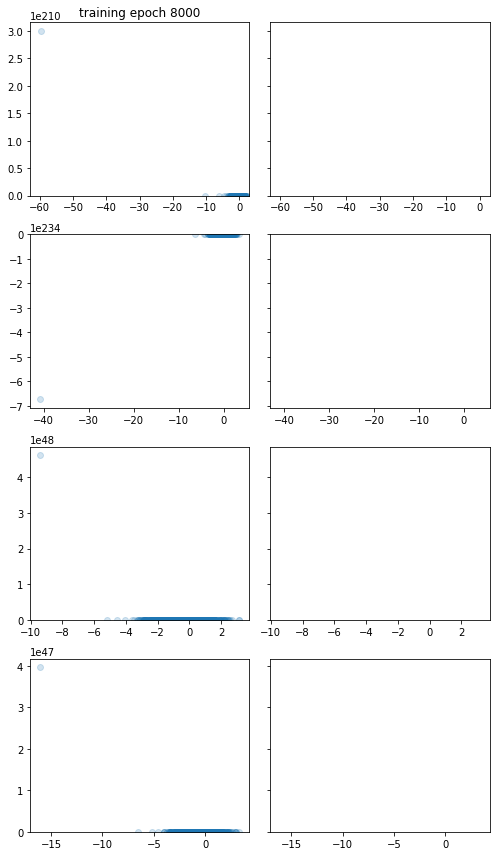

loss: nan, mean log p_x nan:  80%|████████  | 8003/10000 [19:31<09:01,  3.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8005/10000 [19:32<06:40,  4.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8007/10000 [19:32<05:15,  6.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8009/10000 [19:32<04:33,  7.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8011/10000 [19:32<04:14,  7.82it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8013/10000 [19:33<04:04,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8015/10000 [19:33<04:00,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8017/10000 [19:33<03:58,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8019/10000 [19:33<03:57,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8021/10000 [19:34<03:59,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8023/10000 [19:34<03:56,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8025/10000 [19:34<03:55,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8027/10000 [19:34<03:54,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8029/10000 [19:34<03:55,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8031/10000 [19:35<03:55,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8033/10000 [19:35<03:53,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8035/10000 [19:35<03:52,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8037/10000 [19:35<03:58,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8039/10000 [19:36<03:57,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8041/10000 [19:36<03:58,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8043/10000 [19:36<03:57,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8045/10000 [19:36<03:58,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8047/10000 [19:37<04:10,  7.79it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  80%|████████  | 8049/10000 [19:37<04:07,  7.89it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8051/10000 [19:37<03:57,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8053/10000 [19:37<03:56,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8055/10000 [19:38<03:59,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8057/10000 [19:38<03:55,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8059/10000 [19:38<03:53,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8061/10000 [19:38<03:50,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8063/10000 [19:39<03:50,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8065/10000 [19:39<03:49,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8067/10000 [19:39<03:45,  8.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8069/10000 [19:39<03:44,  8.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8071/10000 [19:40<03:40,  8.73it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8073/10000 [19:40<03:46,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8075/10000 [19:40<03:45,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8077/10000 [19:40<03:42,  8.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8079/10000 [19:40<03:40,  8.71it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8081/10000 [19:41<03:41,  8.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8083/10000 [19:41<03:43,  8.56it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8085/10000 [19:41<03:45,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8087/10000 [19:41<03:45,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8089/10000 [19:42<03:44,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8091/10000 [19:42<03:49,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8093/10000 [19:42<03:47,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8095/10000 [19:42<03:48,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8097/10000 [19:43<03:52,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8099/10000 [19:43<03:57,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8100/10000 [19:43<03:54,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8103/10000 [19:43<04:26,  7.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8105/10000 [19:44<04:06,  7.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8107/10000 [19:44<04:11,  7.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8109/10000 [19:44<03:59,  7.90it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8111/10000 [19:44<03:52,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8113/10000 [19:45<03:49,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8115/10000 [19:45<03:50,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8117/10000 [19:45<03:49,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8119/10000 [19:45<03:49,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8121/10000 [19:46<03:50,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████  | 8123/10000 [19:46<03:46,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████▏ | 8125/10000 [19:46<03:44,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████▏ | 8127/10000 [19:46<03:40,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████▏ | 8129/10000 [19:47<03:42,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████▏ | 8131/10000 [19:47<03:45,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████▏ | 8133/10000 [19:47<03:44,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████▏ | 8135/10000 [19:47<04:05,  7.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████▏ | 8137/10000 [19:48<04:07,  7.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████▏ | 8139/10000 [19:48<03:55,  7.89it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████▏ | 8141/10000 [19:48<03:48,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████▏ | 8143/10000 [19:48<03:47,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████▏ | 8145/10000 [19:49<03:45,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████▏ | 8147/10000 [19:49<03:42,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  81%|████████▏ | 8149/10000 [19:49<03:43,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8151/10000 [19:49<03:43,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8153/10000 [19:50<03:44,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8155/10000 [19:50<03:43,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8157/10000 [19:50<03:42,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8159/10000 [19:50<03:43,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8161/10000 [19:51<03:41,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8163/10000 [19:51<03:39,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8165/10000 [19:51<03:39,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8167/10000 [19:51<03:43,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8169/10000 [19:52<03:41,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8171/10000 [19:52<03:41,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8173/10000 [19:52<03:42,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8175/10000 [19:52<03:39,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8177/10000 [19:52<03:38,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8179/10000 [19:53<03:43,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8181/10000 [19:53<03:39,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8183/10000 [19:53<03:37,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8185/10000 [19:53<03:36,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8187/10000 [19:54<03:38,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8189/10000 [19:54<03:39,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8191/10000 [19:54<03:36,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8193/10000 [19:54<03:34,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8195/10000 [19:55<03:33,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8197/10000 [19:55<03:34,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8199/10000 [19:55<03:34,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8200/10000 [19:55<03:34,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8203/10000 [19:56<04:09,  7.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8205/10000 [19:56<03:47,  7.89it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8207/10000 [19:56<03:40,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8209/10000 [19:56<03:37,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8211/10000 [19:57<03:33,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8213/10000 [19:57<03:38,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8215/10000 [19:57<03:42,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8217/10000 [19:57<03:43,  7.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8219/10000 [19:58<03:38,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8221/10000 [19:58<03:31,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8222/10000 [19:58<03:46,  7.87it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8224/10000 [19:58<04:18,  6.88it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8227/10000 [19:59<03:57,  7.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8229/10000 [19:59<03:41,  8.00it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8231/10000 [19:59<03:36,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8233/10000 [20:00<03:34,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8235/10000 [20:00<03:31,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8237/10000 [20:00<03:28,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8239/10000 [20:00<03:29,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8241/10000 [20:00<03:29,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8243/10000 [20:01<03:31,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8245/10000 [20:01<03:28,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8247/10000 [20:01<03:25,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  82%|████████▏ | 8249/10000 [20:01<03:26,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8251/10000 [20:02<03:27,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8253/10000 [20:02<03:26,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8255/10000 [20:02<03:28,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8257/10000 [20:02<03:26,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8259/10000 [20:03<03:29,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8261/10000 [20:03<03:30,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8263/10000 [20:03<03:30,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8265/10000 [20:03<03:46,  7.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8267/10000 [20:04<03:43,  7.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8269/10000 [20:04<03:34,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8271/10000 [20:04<03:30,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8273/10000 [20:04<03:28,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8275/10000 [20:05<03:33,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8277/10000 [20:05<03:28,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8279/10000 [20:05<03:26,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8281/10000 [20:05<03:44,  7.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8282/10000 [20:05<03:59,  7.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8284/10000 [20:06<04:17,  6.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8287/10000 [20:06<04:06,  6.96it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8289/10000 [20:07<04:09,  6.85it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8291/10000 [20:07<03:46,  7.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8293/10000 [20:07<03:34,  7.95it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8295/10000 [20:07<03:29,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8297/10000 [20:08<03:24,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8299/10000 [20:08<03:24,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8300/10000 [20:08<03:24,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8303/10000 [20:08<03:58,  7.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8305/10000 [20:09<03:39,  7.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8307/10000 [20:09<03:29,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8309/10000 [20:09<03:23,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8311/10000 [20:09<03:26,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8313/10000 [20:10<03:23,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8315/10000 [20:10<03:21,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8317/10000 [20:10<03:32,  7.91it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8319/10000 [20:10<03:42,  7.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8321/10000 [20:11<03:32,  7.92it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8323/10000 [20:11<03:31,  7.93it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8325/10000 [20:11<03:26,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8327/10000 [20:11<03:23,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8329/10000 [20:12<03:19,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8331/10000 [20:12<03:18,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8333/10000 [20:12<03:17,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8335/10000 [20:12<03:17,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8337/10000 [20:12<03:16,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8339/10000 [20:13<03:18,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8341/10000 [20:13<03:15,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8343/10000 [20:13<03:15,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8345/10000 [20:13<03:15,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8347/10000 [20:14<03:16,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  83%|████████▎ | 8349/10000 [20:14<03:15,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▎ | 8351/10000 [20:14<03:15,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▎ | 8353/10000 [20:14<03:15,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▎ | 8355/10000 [20:15<03:15,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▎ | 8357/10000 [20:15<03:14,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▎ | 8359/10000 [20:15<03:12,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▎ | 8361/10000 [20:15<03:14,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▎ | 8363/10000 [20:16<03:14,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▎ | 8365/10000 [20:16<03:15,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▎ | 8367/10000 [20:16<03:14,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▎ | 8369/10000 [20:16<03:13,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▎ | 8371/10000 [20:17<03:15,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▎ | 8373/10000 [20:17<03:17,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▍ | 8375/10000 [20:17<03:17,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▍ | 8377/10000 [20:17<03:15,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▍ | 8379/10000 [20:17<03:14,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▍ | 8381/10000 [20:18<03:12,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▍ | 8383/10000 [20:18<03:21,  8.03it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▍ | 8385/10000 [20:18<03:27,  7.78it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▍ | 8387/10000 [20:19<03:23,  7.91it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▍ | 8389/10000 [20:19<03:17,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▍ | 8391/10000 [20:19<03:13,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▍ | 8393/10000 [20:19<03:12,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▍ | 8395/10000 [20:19<03:09,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▍ | 8397/10000 [20:20<03:11,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  84%|████████▍ | 8399/10000 [20:20<03:10,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8400/10000 [20:20<03:07,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8403/10000 [20:21<03:35,  7.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8405/10000 [20:21<03:17,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8407/10000 [20:21<03:07,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8409/10000 [20:21<03:07,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8411/10000 [20:21<03:08,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8413/10000 [20:22<03:12,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8415/10000 [20:22<03:29,  7.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8417/10000 [20:22<03:30,  7.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8419/10000 [20:23<03:23,  7.78it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8421/10000 [20:23<03:18,  7.96it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8423/10000 [20:23<03:13,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8425/10000 [20:23<03:11,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8427/10000 [20:23<03:10,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8429/10000 [20:24<03:10,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8431/10000 [20:24<03:15,  8.03it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8433/10000 [20:24<03:11,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8435/10000 [20:24<03:09,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8437/10000 [20:25<03:07,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8439/10000 [20:25<03:06,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8441/10000 [20:25<03:28,  7.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8442/10000 [20:25<03:42,  7.00it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8445/10000 [20:26<03:39,  7.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8447/10000 [20:26<03:19,  7.78it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  84%|████████▍ | 8449/10000 [20:26<03:11,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8451/10000 [20:27<03:06,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8453/10000 [20:27<03:05,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8455/10000 [20:27<03:05,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8457/10000 [20:27<03:07,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8459/10000 [20:28<03:16,  7.83it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8461/10000 [20:28<03:21,  7.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8463/10000 [20:28<03:17,  7.79it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8465/10000 [20:28<03:10,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8467/10000 [20:29<03:07,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8469/10000 [20:29<03:08,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8471/10000 [20:29<03:03,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8473/10000 [20:29<03:02,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8475/10000 [20:29<03:04,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8477/10000 [20:30<03:03,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8479/10000 [20:30<03:00,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8481/10000 [20:30<02:58,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8483/10000 [20:30<02:56,  8.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8484/10000 [20:31<03:15,  7.74it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8486/10000 [20:31<03:39,  6.91it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8488/10000 [20:31<03:49,  6.58it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8491/10000 [20:32<03:26,  7.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8493/10000 [20:32<03:12,  7.83it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8495/10000 [20:32<03:06,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8497/10000 [20:32<03:05,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x -inf:  85%|████████▍ | 8499/10000 [20:33<03:12,  7.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8500/10000 [20:33<03:13,  7.76it/s] 

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8503/10000 [20:33<03:36,  6.91it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8505/10000 [20:33<03:20,  7.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8507/10000 [20:34<03:09,  7.88it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8509/10000 [20:34<03:04,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8511/10000 [20:34<03:02,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8513/10000 [20:34<02:59,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8515/10000 [20:35<03:14,  7.63it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8517/10000 [20:35<03:13,  7.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8519/10000 [20:35<03:05,  7.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8521/10000 [20:35<03:03,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8523/10000 [20:36<03:01,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8525/10000 [20:36<02:59,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8527/10000 [20:36<02:56,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8529/10000 [20:36<02:57,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8530/10000 [20:37<02:59,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8533/10000 [20:37<03:19,  7.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8535/10000 [20:37<03:06,  7.87it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8537/10000 [20:37<03:02,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8539/10000 [20:38<03:09,  7.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8541/10000 [20:38<03:03,  7.96it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8543/10000 [20:38<03:00,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8545/10000 [20:38<02:56,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8547/10000 [20:39<02:54,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  85%|████████▌ | 8549/10000 [20:39<02:54,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8551/10000 [20:39<02:51,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8553/10000 [20:39<02:50,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8555/10000 [20:40<02:50,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8557/10000 [20:40<02:49,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8559/10000 [20:40<02:49,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8561/10000 [20:40<02:49,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8563/10000 [20:41<02:49,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8565/10000 [20:41<02:48,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8567/10000 [20:41<02:49,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8569/10000 [20:41<02:48,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8571/10000 [20:42<02:47,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8573/10000 [20:42<02:46,  8.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8575/10000 [20:42<02:50,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8577/10000 [20:42<02:48,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8579/10000 [20:42<02:48,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8581/10000 [20:43<02:48,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8583/10000 [20:43<02:48,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8585/10000 [20:43<02:48,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8587/10000 [20:43<02:48,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8589/10000 [20:44<02:48,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8591/10000 [20:44<02:49,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8593/10000 [20:44<02:48,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8595/10000 [20:44<02:53,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8597/10000 [20:45<02:50,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8599/10000 [20:45<02:48,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8600/10000 [20:45<02:47,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8603/10000 [20:46<03:27,  6.73it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8605/10000 [20:46<03:05,  7.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8607/10000 [20:46<02:55,  7.95it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8609/10000 [20:46<02:50,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8611/10000 [20:47<02:50,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8613/10000 [20:47<02:49,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8615/10000 [20:47<02:47,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8617/10000 [20:47<02:47,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8619/10000 [20:47<02:45,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8621/10000 [20:48<02:45,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▌ | 8623/10000 [20:48<02:45,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▋ | 8625/10000 [20:48<02:43,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▋ | 8627/10000 [20:48<02:43,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▋ | 8629/10000 [20:49<02:41,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▋ | 8631/10000 [20:49<02:40,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▋ | 8633/10000 [20:49<02:40,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▋ | 8635/10000 [20:49<02:42,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▋ | 8637/10000 [20:50<02:40,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▋ | 8639/10000 [20:50<02:37,  8.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▋ | 8641/10000 [20:50<02:40,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▋ | 8643/10000 [20:50<02:42,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▋ | 8645/10000 [20:51<02:42,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▋ | 8647/10000 [20:51<02:42,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  86%|████████▋ | 8649/10000 [20:51<02:41,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8651/10000 [20:51<02:45,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8653/10000 [20:52<02:48,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8655/10000 [20:52<02:45,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8657/10000 [20:52<02:47,  8.00it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8659/10000 [20:52<02:45,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8661/10000 [20:53<02:43,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8663/10000 [20:53<02:44,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8665/10000 [20:53<02:45,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8667/10000 [20:53<02:42,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8669/10000 [20:53<02:41,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8671/10000 [20:54<02:39,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8673/10000 [20:54<02:34,  8.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8675/10000 [20:54<02:33,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8677/10000 [20:54<02:32,  8.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8679/10000 [20:55<02:33,  8.58it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8681/10000 [20:55<02:36,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8683/10000 [20:55<02:37,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8685/10000 [20:55<02:39,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8687/10000 [20:56<02:39,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8689/10000 [20:56<02:38,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8691/10000 [20:56<02:37,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8693/10000 [20:56<02:35,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8695/10000 [20:57<02:38,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8697/10000 [20:57<02:35,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8699/10000 [20:57<02:35,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8700/10000 [20:57<02:36,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8703/10000 [20:58<03:04,  7.03it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8705/10000 [20:58<02:50,  7.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8707/10000 [20:58<02:44,  7.87it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8709/10000 [20:58<02:37,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8711/10000 [20:59<02:33,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8713/10000 [20:59<02:35,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8715/10000 [20:59<02:34,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8717/10000 [20:59<02:34,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8719/10000 [21:00<02:34,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8721/10000 [21:00<02:33,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8723/10000 [21:00<02:32,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8725/10000 [21:00<02:35,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8727/10000 [21:01<02:31,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8729/10000 [21:01<02:31,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8731/10000 [21:01<02:32,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8733/10000 [21:01<02:32,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8735/10000 [21:02<02:32,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8737/10000 [21:02<02:28,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8739/10000 [21:02<02:26,  8.58it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8741/10000 [21:02<02:25,  8.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8743/10000 [21:02<02:28,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8745/10000 [21:03<02:26,  8.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8747/10000 [21:03<02:25,  8.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  87%|████████▋ | 8749/10000 [21:03<02:26,  8.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8751/10000 [21:03<02:25,  8.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8752/10000 [21:04<02:42,  7.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8754/10000 [21:04<03:01,  6.87it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8757/10000 [21:04<03:03,  6.79it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8759/10000 [21:05<02:45,  7.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8761/10000 [21:05<02:37,  7.88it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8763/10000 [21:05<02:38,  7.82it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8765/10000 [21:05<02:33,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8766/10000 [21:05<02:36,  7.87it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8768/10000 [21:06<02:56,  6.97it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8771/10000 [21:06<03:01,  6.77it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8773/10000 [21:06<02:45,  7.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8775/10000 [21:07<02:38,  7.73it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8777/10000 [21:07<02:32,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8778/10000 [21:07<02:44,  7.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8781/10000 [21:08<02:38,  7.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8783/10000 [21:08<02:28,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8785/10000 [21:08<02:31,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8787/10000 [21:08<02:30,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8789/10000 [21:08<02:27,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8791/10000 [21:09<02:27,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8793/10000 [21:09<02:27,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8795/10000 [21:09<02:28,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8797/10000 [21:09<02:28,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8799/10000 [21:10<02:25,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8800/10000 [21:10<02:23,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8803/10000 [21:10<02:46,  7.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8805/10000 [21:11<02:34,  7.75it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8807/10000 [21:11<02:28,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8809/10000 [21:11<02:26,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8811/10000 [21:11<02:23,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8813/10000 [21:12<02:22,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8815/10000 [21:12<02:20,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8817/10000 [21:12<02:20,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8819/10000 [21:12<02:20,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8821/10000 [21:12<02:18,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8823/10000 [21:13<02:18,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8825/10000 [21:13<02:18,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8827/10000 [21:13<02:21,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8829/10000 [21:13<02:25,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8831/10000 [21:14<02:22,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8833/10000 [21:14<02:19,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8835/10000 [21:14<02:18,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8837/10000 [21:14<02:17,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8839/10000 [21:15<02:16,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8841/10000 [21:15<02:17,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8843/10000 [21:15<02:16,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8845/10000 [21:15<02:16,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8847/10000 [21:16<02:18,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  88%|████████▊ | 8849/10000 [21:16<02:17,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▊ | 8851/10000 [21:16<02:17,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▊ | 8853/10000 [21:16<02:16,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▊ | 8855/10000 [21:17<02:15,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▊ | 8857/10000 [21:17<02:16,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▊ | 8859/10000 [21:17<02:19,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▊ | 8861/10000 [21:17<02:18,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▊ | 8863/10000 [21:18<02:18,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▊ | 8865/10000 [21:18<02:16,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▊ | 8867/10000 [21:18<02:15,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▊ | 8869/10000 [21:18<02:15,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▊ | 8871/10000 [21:18<02:19,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▊ | 8873/10000 [21:19<02:15,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8875/10000 [21:19<02:15,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8876/10000 [21:19<02:28,  7.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8879/10000 [21:20<02:28,  7.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8881/10000 [21:20<02:20,  7.96it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8883/10000 [21:20<02:16,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8885/10000 [21:20<02:14,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8887/10000 [21:20<02:15,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8889/10000 [21:21<02:12,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8890/10000 [21:21<02:25,  7.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8893/10000 [21:21<02:22,  7.79it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8895/10000 [21:22<02:18,  8.00it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8897/10000 [21:22<02:14,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8899/10000 [21:22<02:12,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8900/10000 [21:22<02:12,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8902/10000 [21:23<03:01,  6.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8904/10000 [21:23<02:58,  6.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8907/10000 [21:23<02:38,  6.91it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8908/10000 [21:23<02:37,  6.95it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8910/10000 [21:24<02:46,  6.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8912/10000 [21:24<02:49,  6.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8914/10000 [21:24<02:51,  6.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8917/10000 [21:25<02:31,  7.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8919/10000 [21:25<02:20,  7.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8921/10000 [21:25<02:15,  7.99it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8923/10000 [21:26<02:13,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8925/10000 [21:26<02:18,  7.77it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8927/10000 [21:26<02:13,  8.05it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8929/10000 [21:26<02:10,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8931/10000 [21:27<02:10,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8933/10000 [21:27<02:16,  7.82it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8935/10000 [21:27<02:11,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8937/10000 [21:27<02:09,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8939/10000 [21:27<02:09,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8941/10000 [21:28<02:09,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8943/10000 [21:28<02:07,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8945/10000 [21:28<02:07,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8947/10000 [21:28<02:08,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  89%|████████▉ | 8949/10000 [21:29<02:10,  8.03it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8951/10000 [21:29<02:08,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8953/10000 [21:29<02:07,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8955/10000 [21:29<02:06,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8957/10000 [21:30<02:10,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8959/10000 [21:30<02:08,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8961/10000 [21:30<02:06,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8963/10000 [21:30<02:04,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8965/10000 [21:31<02:02,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8967/10000 [21:31<02:01,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8969/10000 [21:31<02:01,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8971/10000 [21:31<02:01,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8973/10000 [21:32<02:01,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8975/10000 [21:32<02:01,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8977/10000 [21:32<02:01,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8979/10000 [21:32<02:02,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8981/10000 [21:33<02:01,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8983/10000 [21:33<02:02,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8985/10000 [21:33<02:01,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8987/10000 [21:33<02:02,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8989/10000 [21:34<02:01,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8991/10000 [21:34<02:02,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8993/10000 [21:34<01:59,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8995/10000 [21:34<01:58,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8997/10000 [21:34<01:58,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|████████▉ | 8999/10000 [21:35<01:58,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9000/10000 [21:35<01:58,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9003/10000 [21:35<02:16,  7.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9005/10000 [21:36<02:05,  7.90it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9007/10000 [21:36<02:01,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9009/10000 [21:36<01:59,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9011/10000 [21:36<01:57,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9013/10000 [21:36<01:56,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9015/10000 [21:37<01:57,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9017/10000 [21:37<01:56,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9019/10000 [21:37<01:59,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9021/10000 [21:37<01:58,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9023/10000 [21:38<01:58,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9025/10000 [21:38<01:59,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9027/10000 [21:38<01:57,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9029/10000 [21:38<01:56,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9031/10000 [21:39<01:56,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9033/10000 [21:39<01:56,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9035/10000 [21:39<02:05,  7.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9036/10000 [21:39<02:14,  7.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9039/10000 [21:40<02:13,  7.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9041/10000 [21:40<02:04,  7.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9043/10000 [21:40<01:59,  7.98it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9045/10000 [21:41<01:57,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9047/10000 [21:41<01:57,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  90%|█████████ | 9049/10000 [21:41<01:55,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9051/10000 [21:41<01:55,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9053/10000 [21:41<01:54,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9055/10000 [21:42<01:53,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9057/10000 [21:42<01:52,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9059/10000 [21:42<01:51,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9061/10000 [21:42<01:52,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9063/10000 [21:43<01:50,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9065/10000 [21:43<01:54,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9067/10000 [21:43<01:52,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9069/10000 [21:43<01:51,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9071/10000 [21:44<01:51,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9073/10000 [21:44<01:53,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9075/10000 [21:44<01:51,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9077/10000 [21:44<01:50,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9079/10000 [21:45<01:50,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9081/10000 [21:45<01:49,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9083/10000 [21:45<01:46,  8.58it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9085/10000 [21:45<01:46,  8.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9087/10000 [21:46<01:48,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9089/10000 [21:46<01:48,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9091/10000 [21:46<01:49,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9093/10000 [21:46<01:51,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9095/10000 [21:47<01:54,  7.90it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9097/10000 [21:47<01:51,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9099/10000 [21:47<01:49,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9100/10000 [21:47<01:49,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9103/10000 [21:48<02:11,  6.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9105/10000 [21:48<01:58,  7.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9107/10000 [21:48<01:53,  7.84it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9109/10000 [21:48<01:59,  7.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9110/10000 [21:49<02:06,  7.05it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9113/10000 [21:49<01:59,  7.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9115/10000 [21:49<01:53,  7.81it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9117/10000 [21:49<01:50,  8.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9119/10000 [21:50<01:51,  7.92it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9121/10000 [21:50<01:48,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████ | 9123/10000 [21:50<01:46,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████▏| 9125/10000 [21:50<01:44,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████▏| 9127/10000 [21:51<01:45,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████▏| 9129/10000 [21:51<01:44,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████▏| 9131/10000 [21:51<01:43,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████▏| 9133/10000 [21:51<01:45,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████▏| 9135/10000 [21:52<01:44,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████▏| 9137/10000 [21:52<01:44,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████▏| 9139/10000 [21:52<01:43,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████▏| 9141/10000 [21:52<01:44,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████▏| 9143/10000 [21:53<01:43,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████▏| 9145/10000 [21:53<01:42,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████▏| 9147/10000 [21:53<01:42,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  91%|█████████▏| 9149/10000 [21:53<01:41,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9151/10000 [21:54<01:40,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9153/10000 [21:54<01:40,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9155/10000 [21:54<01:42,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9157/10000 [21:54<01:41,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9159/10000 [21:55<01:41,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9161/10000 [21:55<01:40,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9163/10000 [21:55<01:40,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9165/10000 [21:55<01:40,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9167/10000 [21:56<01:39,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9169/10000 [21:56<01:38,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9171/10000 [21:56<01:39,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9173/10000 [21:56<01:38,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9175/10000 [21:56<01:38,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9177/10000 [21:57<01:38,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9179/10000 [21:57<01:37,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9181/10000 [21:57<01:36,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9183/10000 [21:57<01:36,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9185/10000 [21:58<01:38,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9187/10000 [21:58<01:37,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9189/10000 [21:58<01:38,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9191/10000 [21:58<01:37,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9193/10000 [21:59<01:37,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9195/10000 [21:59<01:36,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9197/10000 [21:59<01:37,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9199/10000 [21:59<01:36,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9200/10000 [22:00<01:37,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9203/10000 [22:00<01:53,  7.01it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9205/10000 [22:00<01:45,  7.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9207/10000 [22:00<01:41,  7.83it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9209/10000 [22:01<01:39,  7.96it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9211/10000 [22:01<01:36,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9213/10000 [22:01<01:36,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9215/10000 [22:01<01:34,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9217/10000 [22:02<01:33,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9219/10000 [22:02<01:32,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9221/10000 [22:02<01:32,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9223/10000 [22:02<01:32,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9225/10000 [22:03<01:31,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9227/10000 [22:03<01:31,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9229/10000 [22:03<01:31,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9231/10000 [22:03<01:31,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9233/10000 [22:04<01:30,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9235/10000 [22:04<01:30,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9237/10000 [22:04<01:31,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9239/10000 [22:04<01:31,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9241/10000 [22:05<01:30,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9243/10000 [22:05<01:31,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9245/10000 [22:05<01:31,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9247/10000 [22:05<01:31,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  92%|█████████▏| 9249/10000 [22:05<01:30,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9251/10000 [22:06<01:28,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9253/10000 [22:06<01:29,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9255/10000 [22:06<01:28,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9257/10000 [22:06<01:30,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9259/10000 [22:07<01:29,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9261/10000 [22:07<01:30,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9263/10000 [22:07<01:33,  7.90it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9265/10000 [22:07<01:30,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9267/10000 [22:08<01:29,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9269/10000 [22:08<01:28,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9271/10000 [22:08<01:27,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9273/10000 [22:08<01:30,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9275/10000 [22:09<01:27,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9277/10000 [22:09<01:26,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9279/10000 [22:09<01:28,  8.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9281/10000 [22:09<01:29,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9283/10000 [22:10<01:26,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9285/10000 [22:10<01:25,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9287/10000 [22:10<01:24,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9289/10000 [22:10<01:25,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9291/10000 [22:11<01:24,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9293/10000 [22:11<01:24,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9295/10000 [22:11<01:25,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9297/10000 [22:11<01:31,  7.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9298/10000 [22:11<01:36,  7.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9300/10000 [22:12<01:36,  7.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9303/10000 [22:12<01:43,  6.75it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9305/10000 [22:13<01:33,  7.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9307/10000 [22:13<01:27,  7.88it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9309/10000 [22:13<01:24,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9311/10000 [22:13<01:22,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9313/10000 [22:13<01:22,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9315/10000 [22:14<01:21,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9317/10000 [22:14<01:21,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9319/10000 [22:14<01:21,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9321/10000 [22:14<01:23,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9323/10000 [22:15<01:21,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9325/10000 [22:15<01:20,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9327/10000 [22:15<01:21,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9329/10000 [22:15<01:21,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9331/10000 [22:16<01:19,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9333/10000 [22:16<01:18,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9335/10000 [22:16<01:18,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9337/10000 [22:16<01:18,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9339/10000 [22:17<01:17,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9341/10000 [22:17<01:18,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9343/10000 [22:17<01:19,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9345/10000 [22:17<01:19,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9347/10000 [22:18<01:18,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  93%|█████████▎| 9349/10000 [22:18<01:17,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▎| 9351/10000 [22:18<01:16,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▎| 9353/10000 [22:18<01:17,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▎| 9355/10000 [22:19<01:17,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▎| 9357/10000 [22:19<01:16,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▎| 9359/10000 [22:19<01:16,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▎| 9361/10000 [22:19<01:15,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▎| 9363/10000 [22:19<01:16,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▎| 9365/10000 [22:20<01:15,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▎| 9367/10000 [22:20<01:14,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▎| 9369/10000 [22:20<01:14,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▎| 9371/10000 [22:20<01:15,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▎| 9373/10000 [22:21<01:14,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9375/10000 [22:21<01:14,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9377/10000 [22:21<01:13,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9379/10000 [22:21<01:13,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9381/10000 [22:22<01:13,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9383/10000 [22:22<01:12,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9385/10000 [22:22<01:13,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9387/10000 [22:22<01:11,  8.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9389/10000 [22:23<01:11,  8.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9391/10000 [22:23<01:09,  8.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9393/10000 [22:23<01:09,  8.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9395/10000 [22:23<01:09,  8.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9397/10000 [22:23<01:09,  8.69it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9399/10000 [22:24<01:17,  7.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9400/10000 [22:24<01:22,  7.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9402/10000 [22:24<01:52,  5.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9405/10000 [22:25<01:26,  6.89it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9407/10000 [22:25<01:18,  7.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9409/10000 [22:25<01:14,  7.95it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9411/10000 [22:25<01:12,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9413/10000 [22:26<01:11,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9415/10000 [22:26<01:11,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9417/10000 [22:26<01:10,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9419/10000 [22:26<01:09,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9421/10000 [22:27<01:09,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9423/10000 [22:27<01:09,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9425/10000 [22:27<01:09,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9427/10000 [22:27<01:10,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9429/10000 [22:28<01:15,  7.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9431/10000 [22:28<01:11,  7.92it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9433/10000 [22:28<01:09,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9435/10000 [22:28<01:07,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9437/10000 [22:29<01:07,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9439/10000 [22:29<01:08,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9441/10000 [22:29<01:06,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9443/10000 [22:29<01:05,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9445/10000 [22:30<01:05,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9447/10000 [22:30<01:05,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  94%|█████████▍| 9449/10000 [22:30<01:06,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9451/10000 [22:30<01:05,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9453/10000 [22:31<01:05,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9455/10000 [22:31<01:05,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9457/10000 [22:31<01:04,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9459/10000 [22:31<01:04,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9461/10000 [22:31<01:03,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9463/10000 [22:32<01:04,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9465/10000 [22:32<01:03,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9467/10000 [22:32<01:04,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9469/10000 [22:33<01:09,  7.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9471/10000 [22:33<01:06,  7.96it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9473/10000 [22:33<01:04,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9475/10000 [22:33<01:03,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9477/10000 [22:33<01:03,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9479/10000 [22:34<01:02,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9481/10000 [22:34<01:03,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9483/10000 [22:34<01:02,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9485/10000 [22:34<01:02,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9487/10000 [22:35<01:03,  8.05it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9489/10000 [22:35<01:04,  7.95it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9491/10000 [22:35<01:02,  8.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9493/10000 [22:35<01:02,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9495/10000 [22:36<01:01,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9497/10000 [22:36<01:00,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▍| 9499/10000 [22:36<01:00,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9500/10000 [22:36<00:59,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9503/10000 [22:37<01:12,  6.89it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9505/10000 [22:37<01:05,  7.57it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9507/10000 [22:37<01:02,  7.91it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9509/10000 [22:38<01:00,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9511/10000 [22:38<00:59,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9513/10000 [22:38<01:00,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9515/10000 [22:38<00:59,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9517/10000 [22:39<00:58,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9519/10000 [22:39<00:58,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9521/10000 [22:39<00:57,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9523/10000 [22:39<00:56,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9525/10000 [22:39<00:56,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9527/10000 [22:40<00:56,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9529/10000 [22:40<00:56,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9531/10000 [22:40<00:55,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9533/10000 [22:40<00:54,  8.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9535/10000 [22:41<00:53,  8.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9537/10000 [22:41<00:53,  8.63it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9539/10000 [22:41<00:58,  7.95it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9541/10000 [22:41<00:56,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9543/10000 [22:42<00:54,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9545/10000 [22:42<00:54,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9547/10000 [22:42<00:54,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  95%|█████████▌| 9549/10000 [22:42<00:53,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9551/10000 [22:43<00:53,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9553/10000 [22:43<00:54,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9555/10000 [22:43<00:53,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9557/10000 [22:43<00:53,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9559/10000 [22:44<00:52,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9561/10000 [22:44<00:51,  8.47it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9563/10000 [22:44<00:51,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9565/10000 [22:44<00:51,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9567/10000 [22:44<00:50,  8.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9569/10000 [22:45<00:50,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9571/10000 [22:45<00:52,  8.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9573/10000 [22:45<00:51,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9575/10000 [22:45<00:51,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9577/10000 [22:46<00:51,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9579/10000 [22:46<00:50,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9581/10000 [22:46<00:50,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9583/10000 [22:46<00:49,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9585/10000 [22:47<00:49,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9587/10000 [22:47<00:49,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9589/10000 [22:47<00:50,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9591/10000 [22:47<00:50,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9593/10000 [22:48<00:49,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9595/10000 [22:48<00:48,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9597/10000 [22:48<00:52,  7.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9599/10000 [22:48<00:50,  7.89it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9600/10000 [22:49<00:50,  7.97it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9603/10000 [22:49<00:56,  6.99it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9605/10000 [22:49<00:53,  7.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9607/10000 [22:50<00:50,  7.82it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9609/10000 [22:50<00:48,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9611/10000 [22:50<00:47,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9613/10000 [22:50<00:46,  8.32it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9615/10000 [22:50<00:46,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9617/10000 [22:51<00:45,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9619/10000 [22:51<00:45,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9621/10000 [22:51<00:44,  8.48it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▌| 9622/10000 [22:51<00:49,  7.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▋| 9625/10000 [22:52<00:51,  7.23it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▋| 9627/10000 [22:52<00:47,  7.78it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▋| 9629/10000 [22:52<00:45,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▋| 9631/10000 [22:52<00:44,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▋| 9633/10000 [22:53<00:42,  8.60it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▋| 9635/10000 [22:53<00:42,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▋| 9637/10000 [22:53<00:42,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▋| 9639/10000 [22:53<00:42,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▋| 9641/10000 [22:54<00:43,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▋| 9643/10000 [22:54<00:42,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▋| 9645/10000 [22:54<00:42,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▋| 9647/10000 [22:54<00:41,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  96%|█████████▋| 9649/10000 [22:55<00:41,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9651/10000 [22:55<00:44,  7.81it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9653/10000 [22:55<00:46,  7.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9655/10000 [22:55<00:48,  7.14it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9657/10000 [22:56<00:48,  7.03it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9658/10000 [22:56<00:50,  6.79it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9661/10000 [22:56<00:45,  7.49it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9663/10000 [22:57<00:42,  8.00it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9665/10000 [22:57<00:40,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9667/10000 [22:57<00:39,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9669/10000 [22:57<00:39,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9671/10000 [22:57<00:39,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9673/10000 [22:58<00:39,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9675/10000 [22:58<00:38,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9677/10000 [22:58<00:39,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9679/10000 [22:58<00:39,  8.22it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9681/10000 [22:59<00:39,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9683/10000 [22:59<00:38,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9685/10000 [22:59<00:37,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9687/10000 [22:59<00:40,  7.76it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9688/10000 [23:00<00:42,  7.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9691/10000 [23:00<00:40,  7.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9693/10000 [23:00<00:39,  7.87it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9695/10000 [23:00<00:37,  8.06it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9697/10000 [23:01<00:36,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9699/10000 [23:01<00:35,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9700/10000 [23:01<00:35,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9703/10000 [23:02<00:41,  7.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9705/10000 [23:02<00:38,  7.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9707/10000 [23:02<00:36,  7.99it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9709/10000 [23:02<00:35,  8.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9711/10000 [23:03<00:34,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9713/10000 [23:03<00:33,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9715/10000 [23:03<00:33,  8.58it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9717/10000 [23:03<00:32,  8.74it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9719/10000 [23:03<00:32,  8.68it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9721/10000 [23:04<00:31,  8.74it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9723/10000 [23:04<00:32,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9725/10000 [23:04<00:33,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9727/10000 [23:04<00:32,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9729/10000 [23:05<00:32,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9731/10000 [23:05<00:32,  8.16it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9733/10000 [23:05<00:32,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9735/10000 [23:05<00:32,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9737/10000 [23:06<00:31,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9739/10000 [23:06<00:30,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9741/10000 [23:06<00:31,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9743/10000 [23:06<00:30,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9745/10000 [23:07<00:30,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9747/10000 [23:07<00:30,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  97%|█████████▋| 9749/10000 [23:07<00:30,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9751/10000 [23:07<00:31,  7.96it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9753/10000 [23:08<00:29,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9755/10000 [23:08<00:28,  8.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9757/10000 [23:08<00:28,  8.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9759/10000 [23:08<00:28,  8.52it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9761/10000 [23:08<00:28,  8.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9763/10000 [23:09<00:28,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9765/10000 [23:09<00:30,  7.74it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9767/10000 [23:09<00:29,  7.80it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9769/10000 [23:09<00:28,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9771/10000 [23:10<00:27,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9773/10000 [23:10<00:27,  8.36it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9775/10000 [23:10<00:27,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9777/10000 [23:10<00:27,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9779/10000 [23:11<00:27,  8.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9781/10000 [23:11<00:27,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9783/10000 [23:11<00:26,  8.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9785/10000 [23:11<00:25,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9787/10000 [23:12<00:25,  8.51it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9789/10000 [23:12<00:24,  8.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9791/10000 [23:12<00:24,  8.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9793/10000 [23:12<00:23,  8.64it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9795/10000 [23:13<00:23,  8.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9797/10000 [23:13<00:23,  8.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9799/10000 [23:13<00:23,  8.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9800/10000 [23:13<00:23,  8.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9803/10000 [23:14<00:27,  7.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9805/10000 [23:14<00:25,  7.79it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9807/10000 [23:14<00:23,  8.07it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9809/10000 [23:14<00:23,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9811/10000 [23:15<00:22,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9813/10000 [23:15<00:22,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9815/10000 [23:15<00:22,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9817/10000 [23:15<00:21,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9819/10000 [23:16<00:21,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9821/10000 [23:16<00:21,  8.46it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9823/10000 [23:16<00:21,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9825/10000 [23:16<00:21,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9827/10000 [23:17<00:20,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9829/10000 [23:17<00:20,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9831/10000 [23:17<00:20,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9833/10000 [23:17<00:19,  8.37it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9835/10000 [23:17<00:20,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9837/10000 [23:18<00:19,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9839/10000 [23:18<00:19,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9841/10000 [23:18<00:18,  8.42it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9843/10000 [23:18<00:18,  8.40it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9845/10000 [23:19<00:18,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9847/10000 [23:19<00:18,  8.25it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  98%|█████████▊| 9849/10000 [23:19<00:18,  8.19it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▊| 9851/10000 [23:19<00:18,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▊| 9853/10000 [23:20<00:17,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▊| 9855/10000 [23:20<00:17,  8.31it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▊| 9857/10000 [23:20<00:17,  8.38it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▊| 9859/10000 [23:20<00:17,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▊| 9861/10000 [23:21<00:16,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▊| 9863/10000 [23:21<00:16,  8.35it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▊| 9865/10000 [23:21<00:16,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▊| 9867/10000 [23:21<00:15,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▊| 9869/10000 [23:22<00:15,  8.45it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▊| 9871/10000 [23:22<00:16,  7.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▊| 9872/10000 [23:22<00:17,  7.18it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▊| 9874/10000 [23:22<00:18,  6.73it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9877/10000 [23:23<00:18,  6.79it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9878/10000 [23:23<00:18,  6.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9880/10000 [23:23<00:18,  6.50it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9883/10000 [23:24<00:17,  6.67it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9885/10000 [23:24<00:15,  7.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9887/10000 [23:24<00:14,  7.59it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9889/10000 [23:24<00:13,  7.95it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9891/10000 [23:25<00:13,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9893/10000 [23:25<00:12,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9895/10000 [23:25<00:12,  8.39it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9897/10000 [23:25<00:12,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9899/10000 [23:26<00:12,  7.79it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9900/10000 [23:26<00:13,  7.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9903/10000 [23:26<00:15,  6.09it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9905/10000 [23:27<00:13,  7.12it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9907/10000 [23:27<00:12,  7.74it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9909/10000 [23:27<00:11,  8.08it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9911/10000 [23:27<00:10,  8.13it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9913/10000 [23:28<00:10,  8.24it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9915/10000 [23:28<00:10,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9917/10000 [23:28<00:09,  8.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9919/10000 [23:28<00:09,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9921/10000 [23:29<00:09,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9923/10000 [23:29<00:09,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9925/10000 [23:29<00:09,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9927/10000 [23:29<00:08,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9929/10000 [23:30<00:08,  8.02it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9931/10000 [23:30<00:08,  8.10it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9933/10000 [23:30<00:08,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9935/10000 [23:30<00:07,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9937/10000 [23:31<00:08,  7.86it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9939/10000 [23:31<00:07,  7.70it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9941/10000 [23:31<00:07,  7.99it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9943/10000 [23:31<00:06,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9945/10000 [23:32<00:06,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9947/10000 [23:32<00:06,  8.34it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan:  99%|█████████▉| 9949/10000 [23:32<00:06,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9951/10000 [23:32<00:05,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9952/10000 [23:32<00:06,  7.65it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9955/10000 [23:33<00:05,  7.84it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9957/10000 [23:33<00:05,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9959/10000 [23:33<00:04,  8.33it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9961/10000 [23:33<00:04,  8.27it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9963/10000 [23:34<00:04,  8.43it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9965/10000 [23:34<00:04,  8.53it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9967/10000 [23:34<00:03,  8.54it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9969/10000 [23:34<00:03,  8.61it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9971/10000 [23:35<00:03,  8.62it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9973/10000 [23:35<00:03,  8.66it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9975/10000 [23:35<00:02,  8.72it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9977/10000 [23:35<00:02,  8.55it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9979/10000 [23:36<00:02,  8.04it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9981/10000 [23:36<00:02,  8.15it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9983/10000 [23:36<00:02,  8.21it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9985/10000 [23:36<00:01,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9987/10000 [23:37<00:01,  8.17it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9989/10000 [23:37<00:01,  8.20it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9991/10000 [23:37<00:01,  8.30it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9993/10000 [23:37<00:00,  8.26it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9995/10000 [23:38<00:00,  8.28it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9997/10000 [23:38<00:00,  8.29it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|█████████▉| 9999/10000 [23:38<00:00,  8.44it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: nan, mean log p_x nan: 100%|██████████| 10000/10000 [23:38<00:00,  7.05it/s]

Nan/Inf loss encountered


In [30]:
history = tester.train(epochs, batch_size=batch_size, clip_grad_norm=clip_grad_norm, max_grad_norm=1,
                       intermediate_plots=True, plotting_func=plotter, n_plots=n_plots)


NaN encountered in loss history
NaN encountered in log_p_x history
NaN encountered in log_q_x history
NaN encountered in kl history
NaN encountered in alpha_2_divergence history
NaN encountered in importance_weights_var history
NaN encountered in normalised_importance_weights_var history
NaN encountered in effective_sample_size history


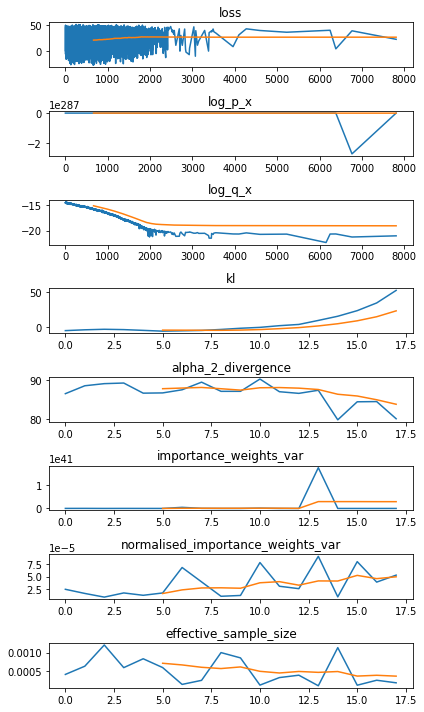

In [31]:
plot_history(history)

In [43]:
import torch.nn.functional as F
@torch.no_grad()
def generate_samples_and_weights(self, n_samples:int=1000, drop_nan_and_infs=True):
    x_samples, log_q_x = self.sampling_distribution(n_samples)
    log_p_x = self.target_distribution.log_prob(x_samples)
    log_w = log_p_x - log_q_x
    if drop_nan_and_infs:
        contains_neg_infs = (torch.isinf(log_w) | torch.isnan(log_w)) & (log_w < torch.tensor(0.0))
        n_valid_samples = torch.sum(~contains_neg_infs)
        log_w = torch.masked_select(log_w, ~contains_neg_infs)
        x_flat = torch.masked_select(x_samples, ~contains_neg_infs[:, None].repeat(1, x_samples.shape[-1]))
        x_samples = x_flat.unflatten(dim=0, sizes=(n_valid_samples, x_samples.shape[-1]))
    normalised_sampling_weights = F.softmax(log_w, dim=-1)
    return x_samples, normalised_sampling_weights

In [44]:
tester.importance_sampler.generate_samples_and_weights = generate_samples_and_weights

In [50]:
n_samples=1000
x_samples, log_q_x = tester.learnt_sampling_dist(n_samples)
log_p_x = tester.target_dist.log_prob(x_samples)
log_w = log_p_x - log_q_x
contains_neg_infs = (torch.isinf(log_w) | torch.isnan(log_w)) & (log_w < torch.tensor(0.0))
n_valid_samples = torch.sum(~contains_neg_infs)
log_w = torch.masked_select(log_w, ~contains_neg_infs)
x_flat = torch.masked_select(x_samples, ~contains_neg_infs[:, None].repeat(1, x_samples.shape[-1]))
x_samples = x_flat.unflatten(dim=0, sizes=(n_valid_samples, x_samples.shape[-1]))
normalised_sampling_weights = F.softmax(log_w, dim=-1)

In [63]:
log_q_x[torch.argmax(log_w)]

tensor(nan, grad_fn=<SelectBackward>)

In [45]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n"
      f"effective sample size before is {info_before['effective_sample_size'] / n_samples_estimation}\n"
      f"effective sample size after train is {info['effective_sample_size'] / n_samples_estimation}\n"
      f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

estimate before training is 42.2043455508248 
estimate after training is nan 
effective sample size before is 0.0005755491523216356
effective sample size after train is nan
variance in weights is nan


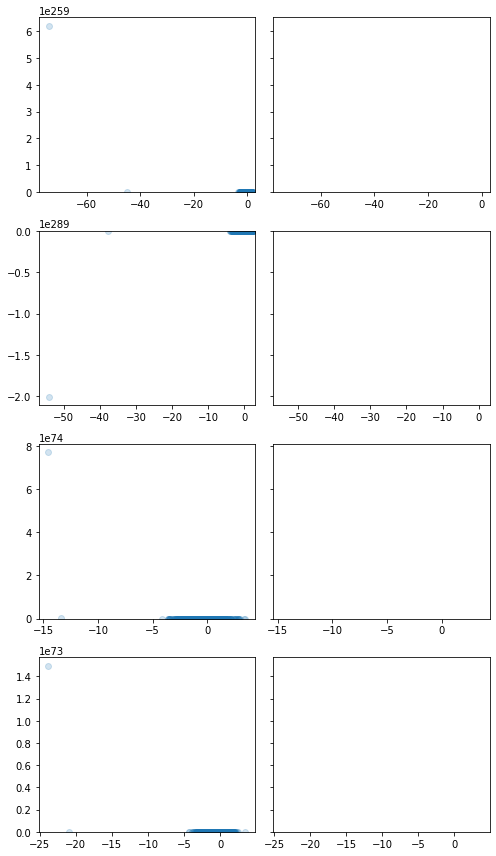

In [34]:
plotter(tester)